In [1]:
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

file_path = "D:\Jupyter_Project\ML_Team\Data\2year.csv"
df = pd.read_csv(r"D:\Jupyter_Project\ML_Team\Data\2year.csv")
df.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,1,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,0
1,2,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,0
2,3,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,0
3,4,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,0
4,5,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,0


# ID 제거

In [2]:
df = df.drop(["id"],axis=1)

# 중복 데이터 확인

In [3]:
if df.duplicated().sum()>0:
    # 중복제거
    print("중복 데이터 Check!")
    print("중복된 데이터 수 : ",df.duplicated().sum())
    df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
    print("제거 후 :" ,df.duplicated().sum())


중복 데이터 Check!
중복된 데이터 수 :  90
제거 후 : 0


# 결측치 확인

<AxesSubplot:>

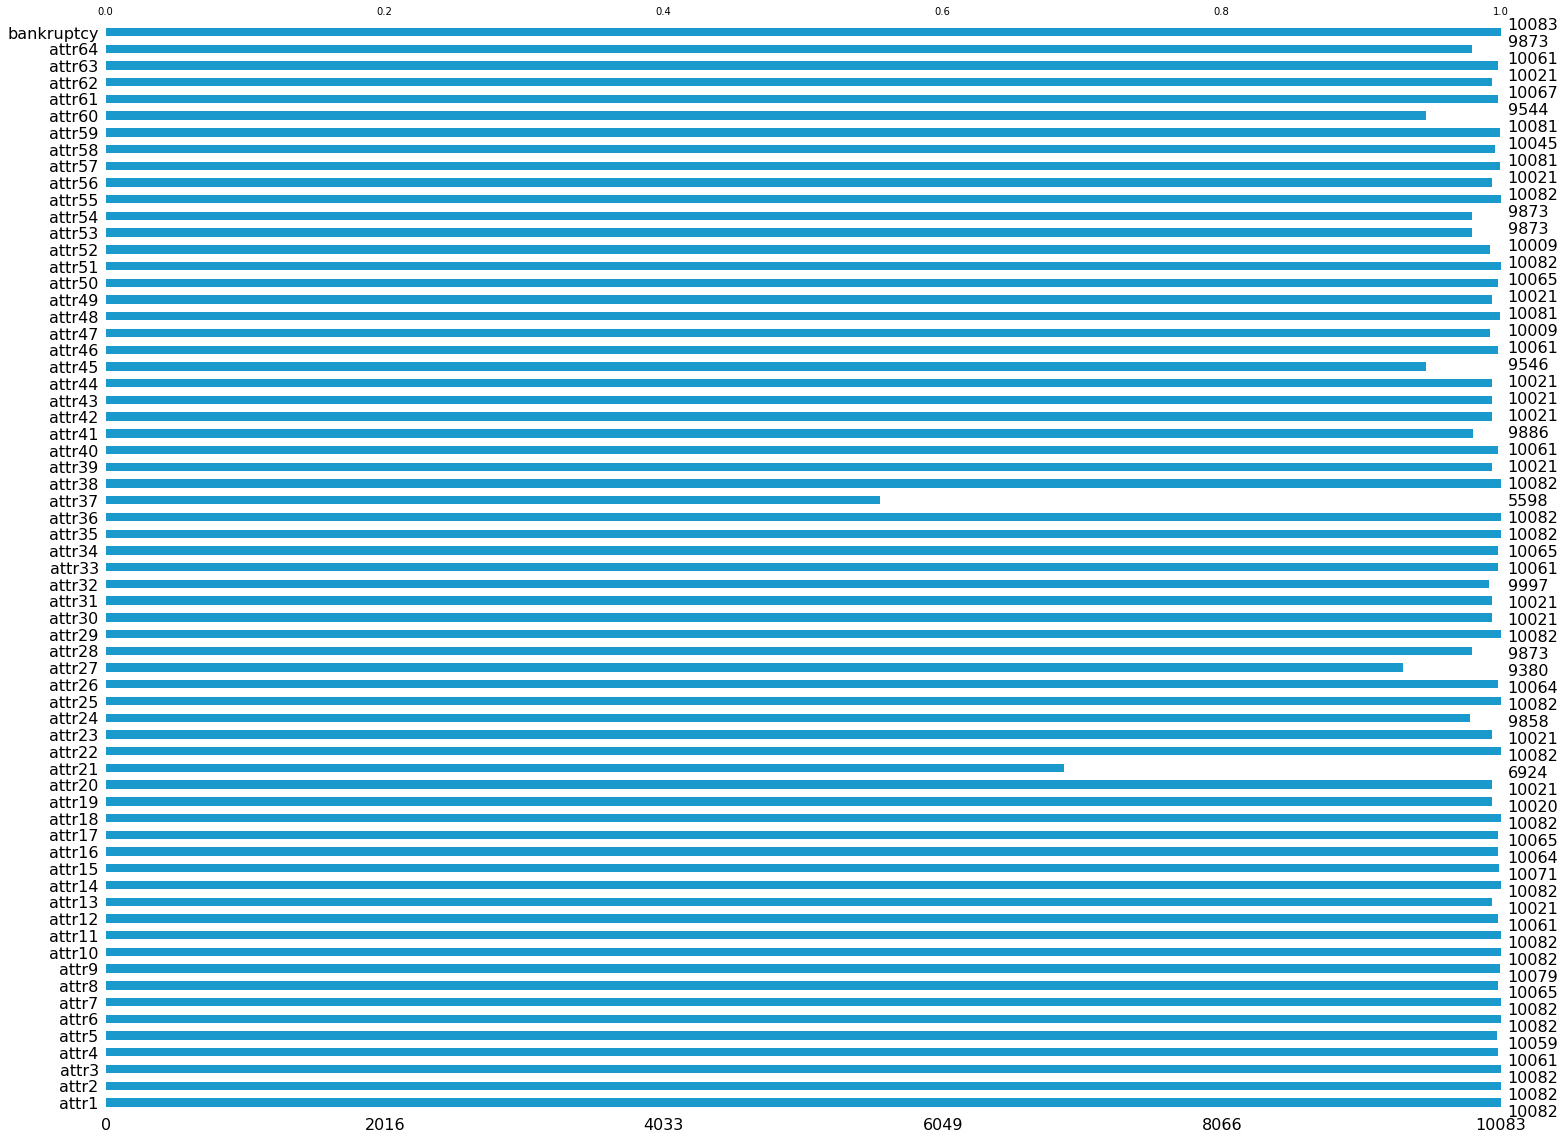

In [4]:
msno.bar(df=df.iloc[:, :], color=(0.1, 0.6, 0.8))

# KNN 결측치 대체 방법

In [5]:
df_columns = df.columns
imputer=KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns = df_columns)
df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,0.0
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,0.0
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,0.0
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,0.0
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,...,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199,1.0
10079,0.012843,0.49306,-0.160620,0.61898,-24.80100,0.012843,0.012843,0.905900,1.01450,0.446660,...,0.014247,0.028752,0.98575,0.160090,48.6660,63.75200,40.071,9.10870,5.1956,1.0
10080,0.015092,0.55759,-0.284600,0.48599,-85.57100,0.015092,0.009826,0.694880,1.00600,0.387460,...,0.005971,0.038950,0.99403,0.010091,15.0530,11.96400,114.250,3.19480,2.4201,1.0
10081,-0.002554,0.47076,0.424010,1.90070,0.95483,-0.002554,0.001785,1.114400,0.99293,0.524640,...,-0.007122,-0.004869,1.00710,0.000000,6.4289,5.70250,64.291,5.67730,25.3990,1.0


<AxesSubplot:>

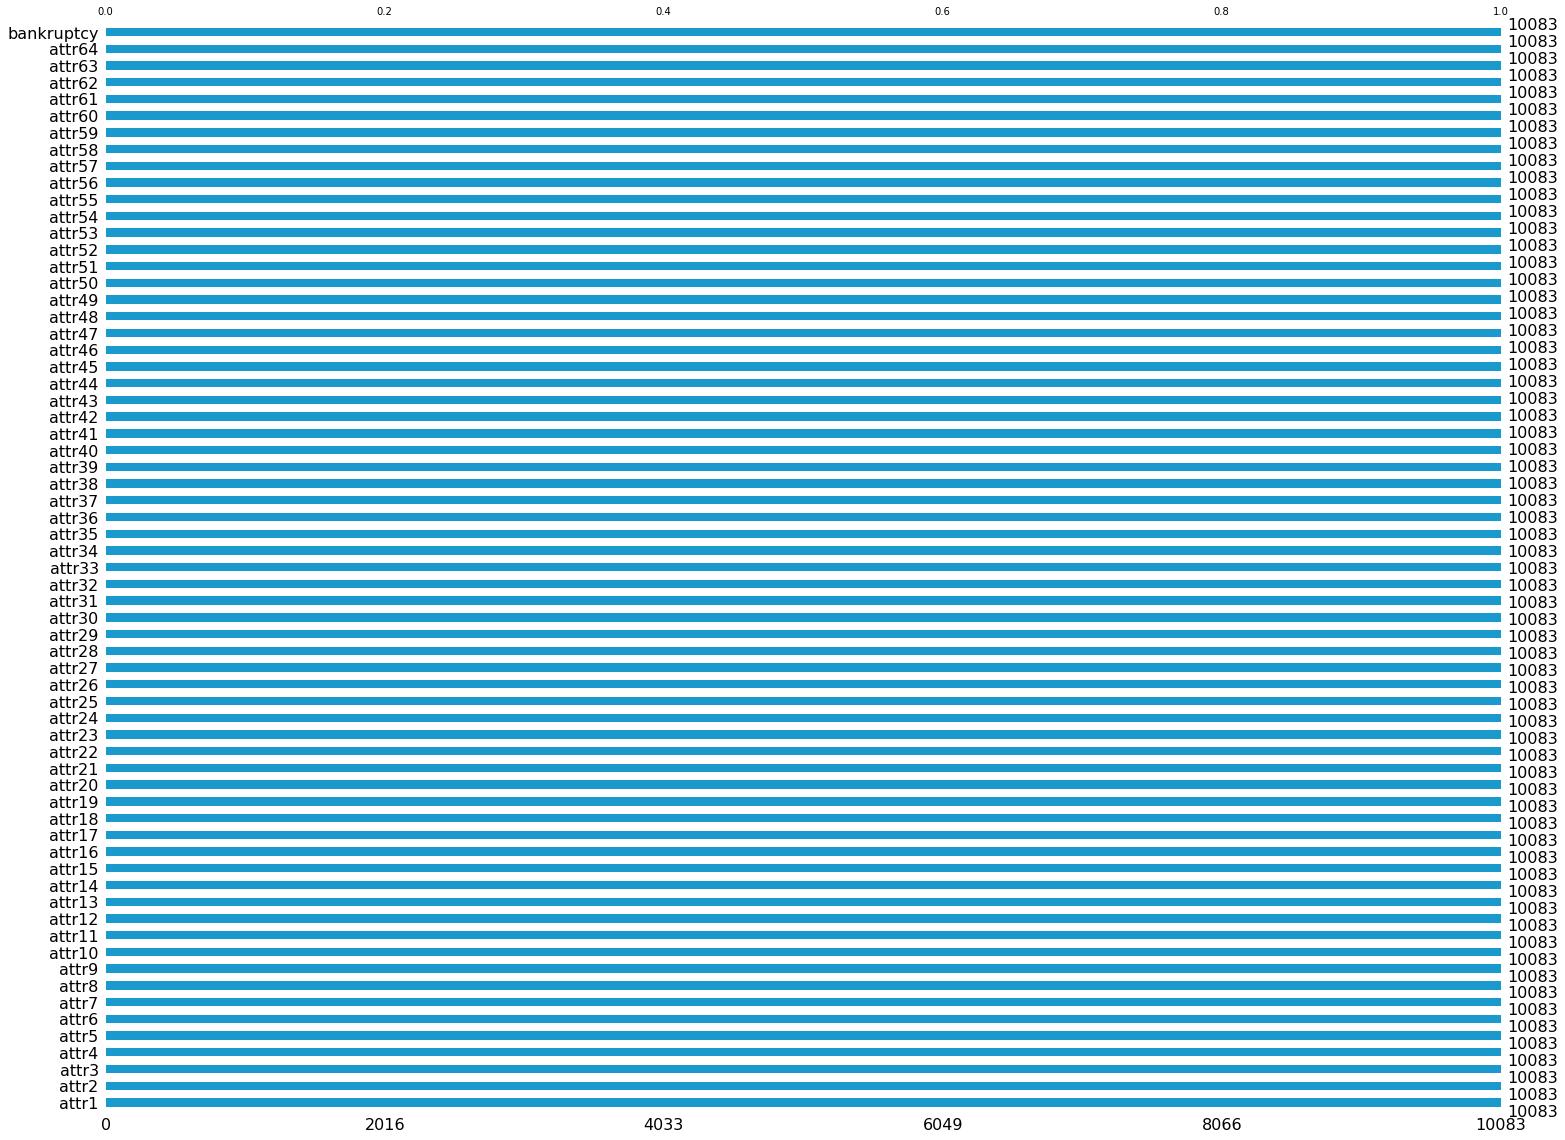

In [6]:
msno.bar(df=df.iloc[:, :], color=(0.1, 0.6, 0.8))

## X, Y , column Name 추출

In [7]:
X = df.drop(labels=['bankruptcy'], axis=1)
y = df['bankruptcy']
col_names = X.columns

# Histogram

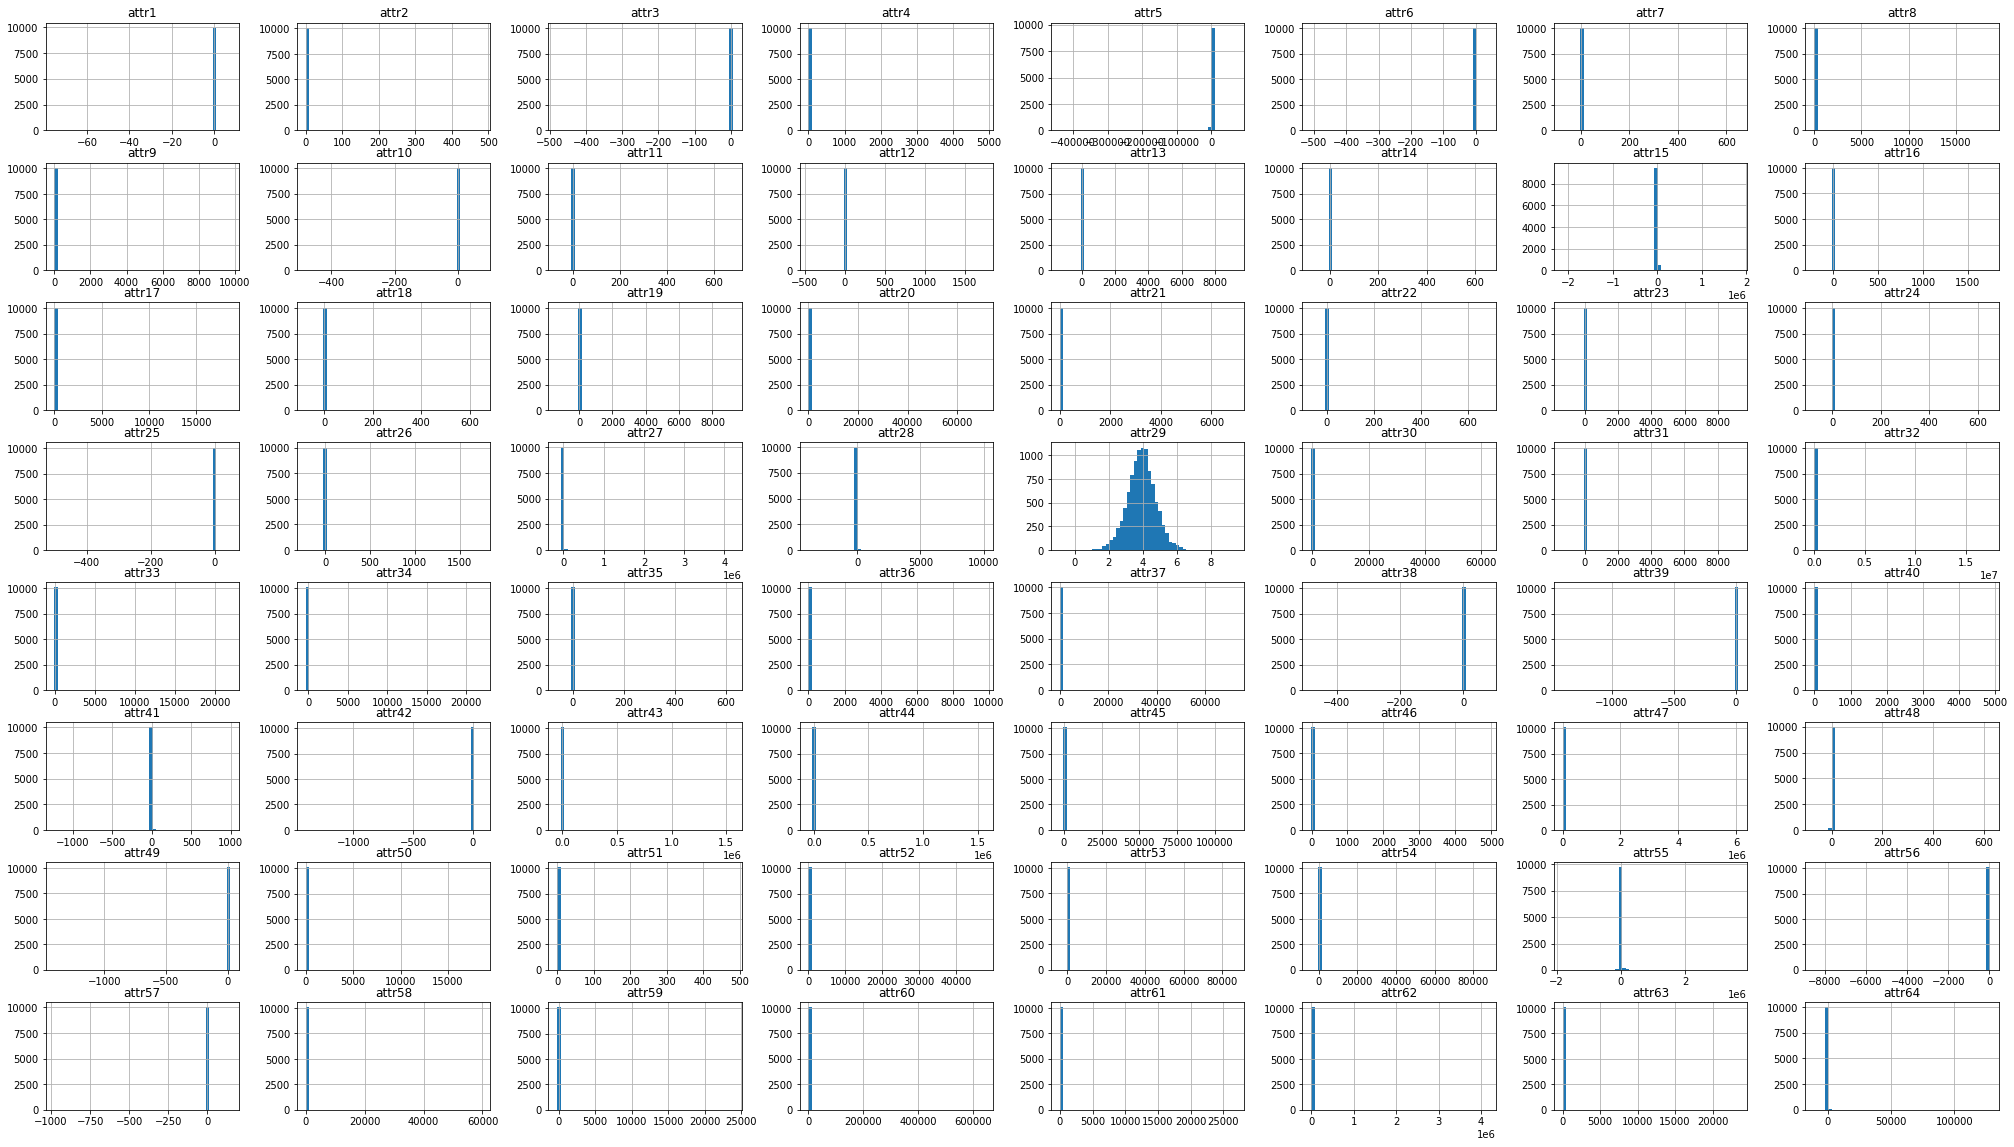

In [8]:
df.drop(labels=["bankruptcy"],axis=1).hist(bins = 50, figsize = (35,20))
plt.show()

# 이상치 확인

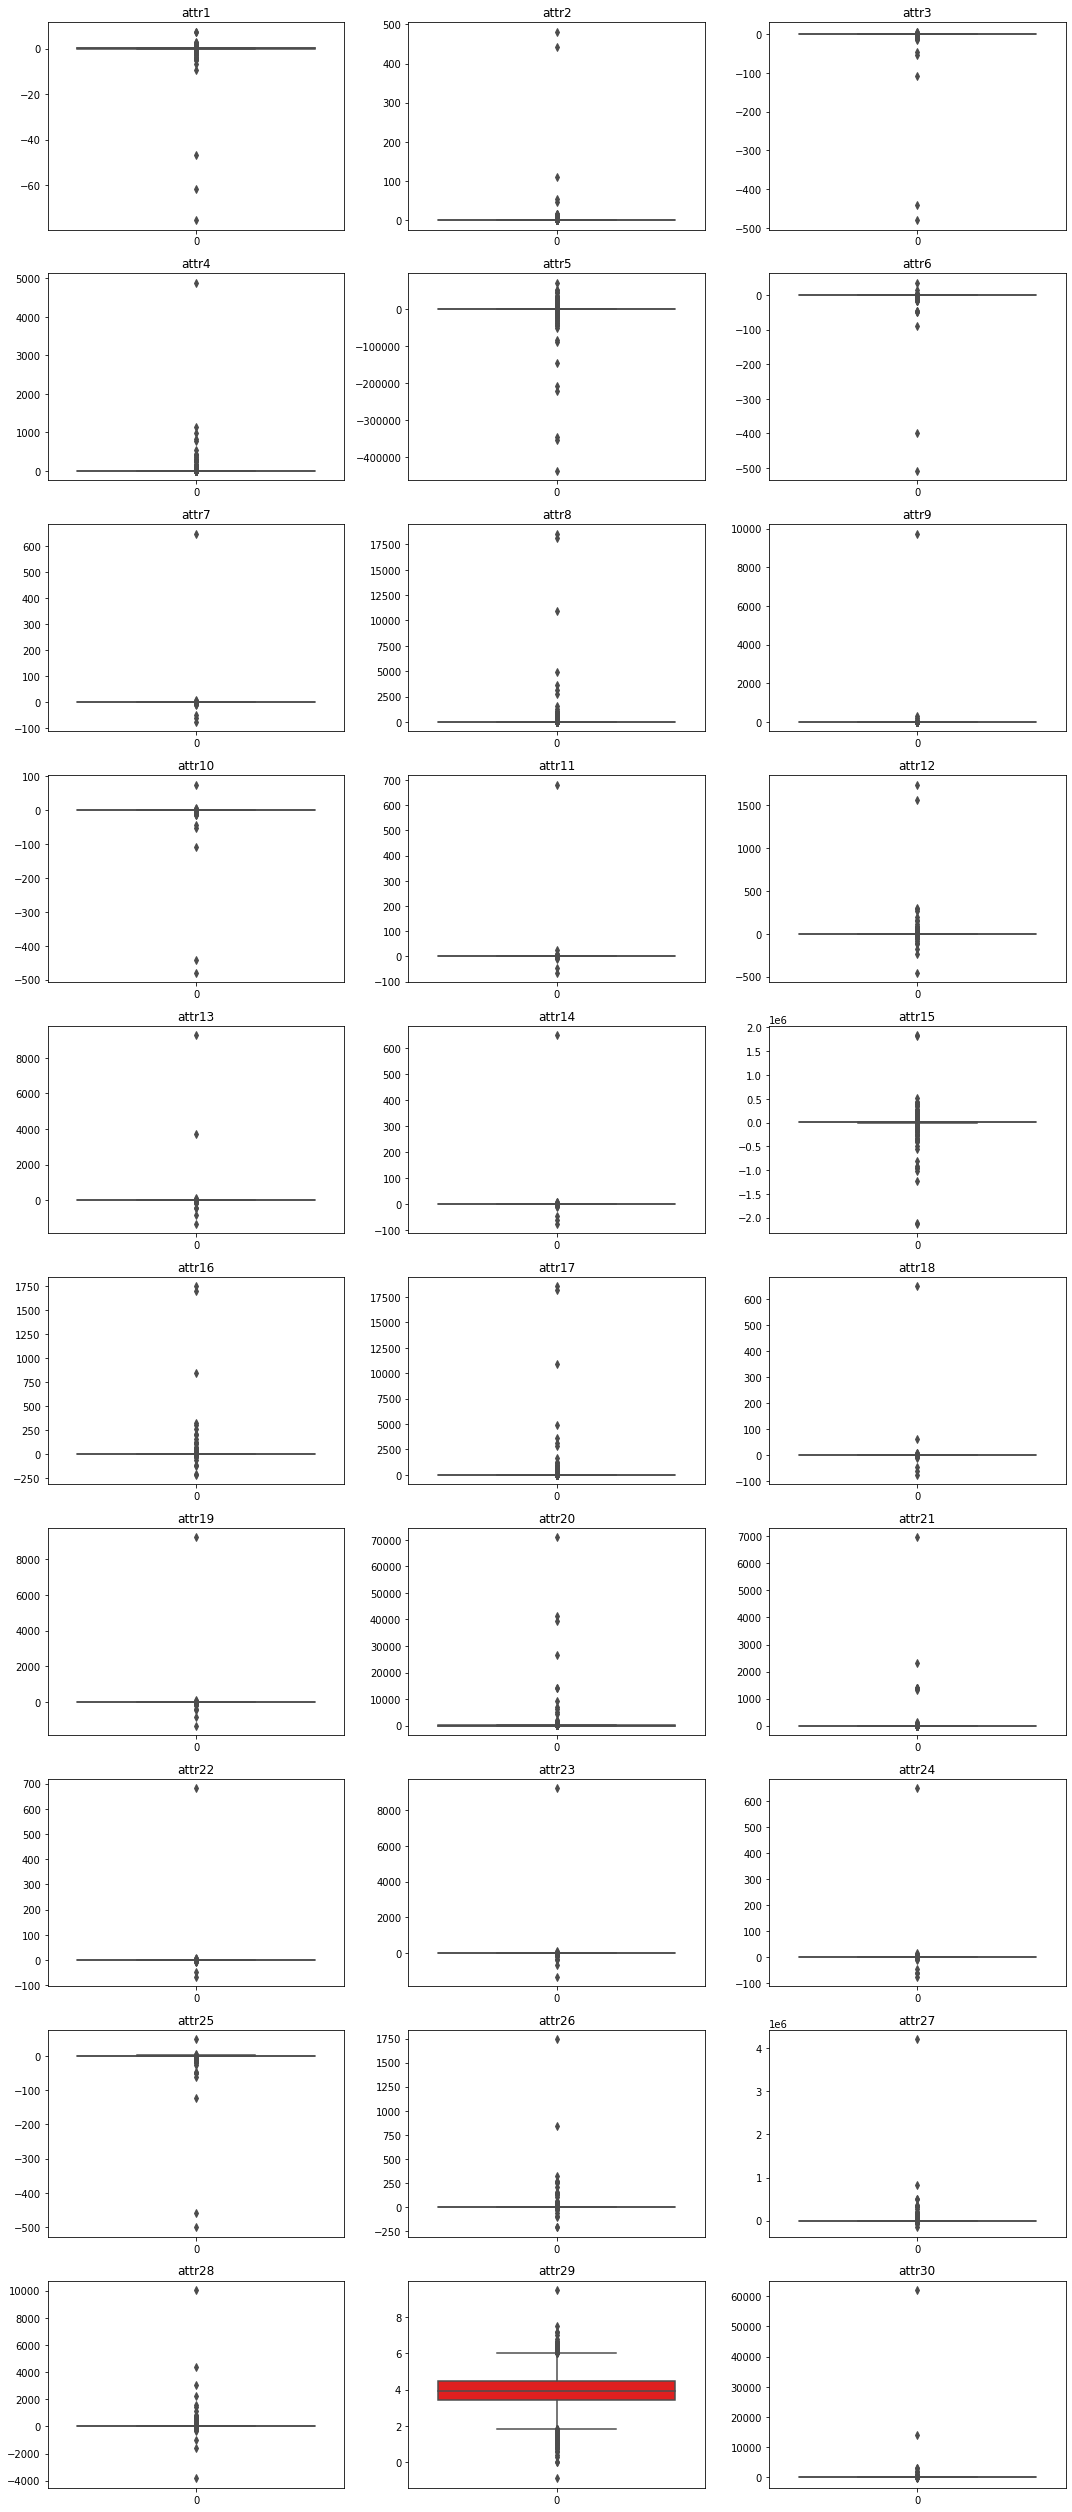

In [9]:
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
a = a.ravel()
k=0
for idx,ax in enumerate(a):
    sns.boxplot(data=df[col_names[k]],color="red",ax=ax)
    ax.set_title(col_names[k])
    #ax.legend()
    k+=1
plt.tight_layout()

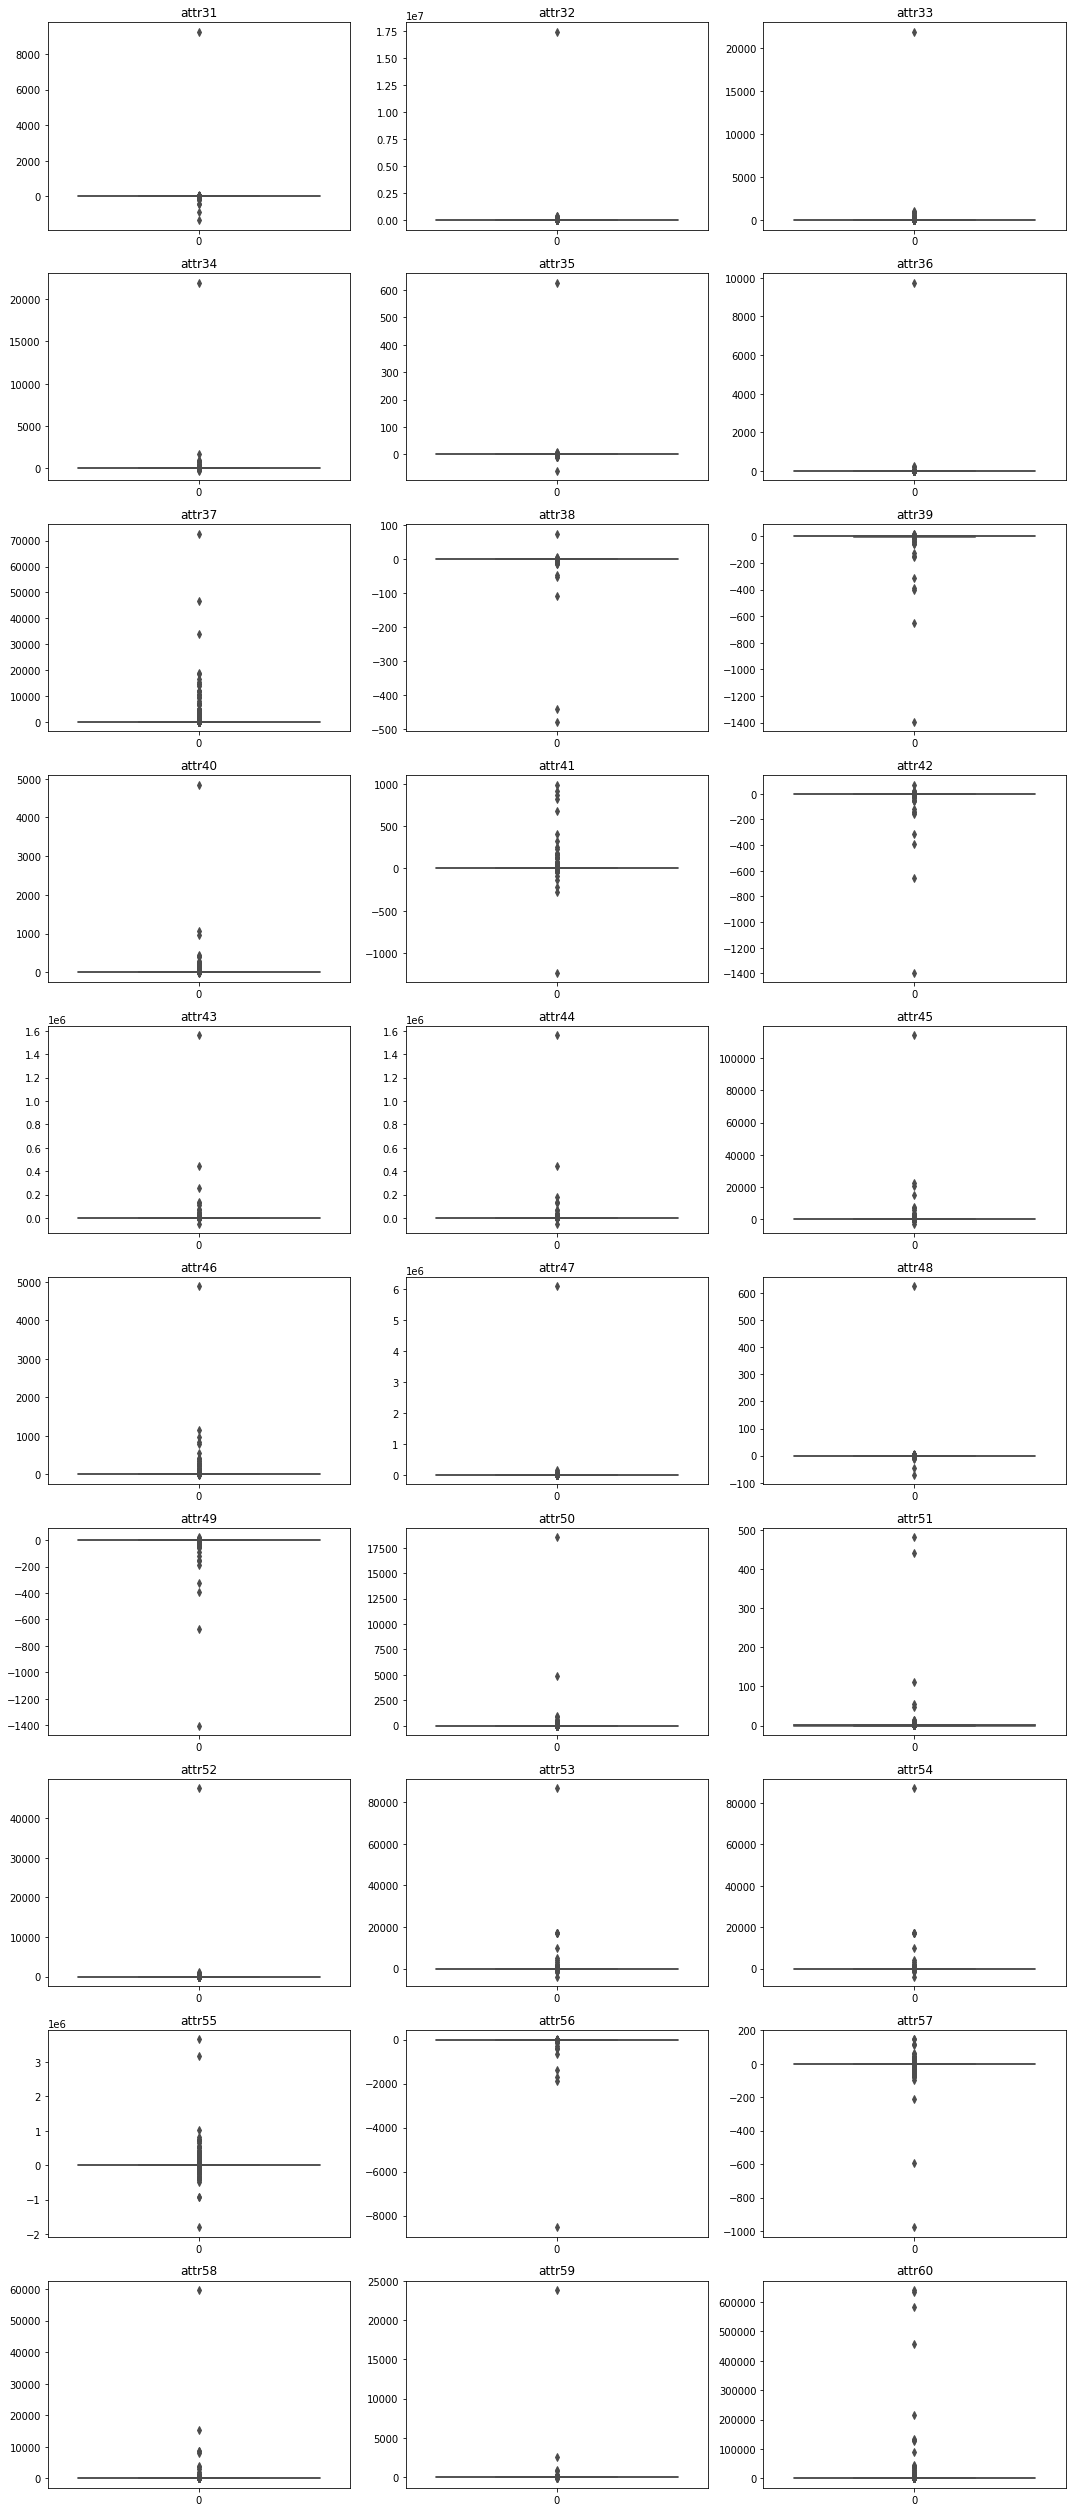

In [10]:
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
a = a.ravel()
for idx,ax in enumerate(a):
    if k >= len(col_names):
        break
    sns.boxplot(data=df[col_names[k]],color="red",ax=ax)
    ax.set_title(col_names[k])
    #ax.legend()
    k+=1
plt.tight_layout()

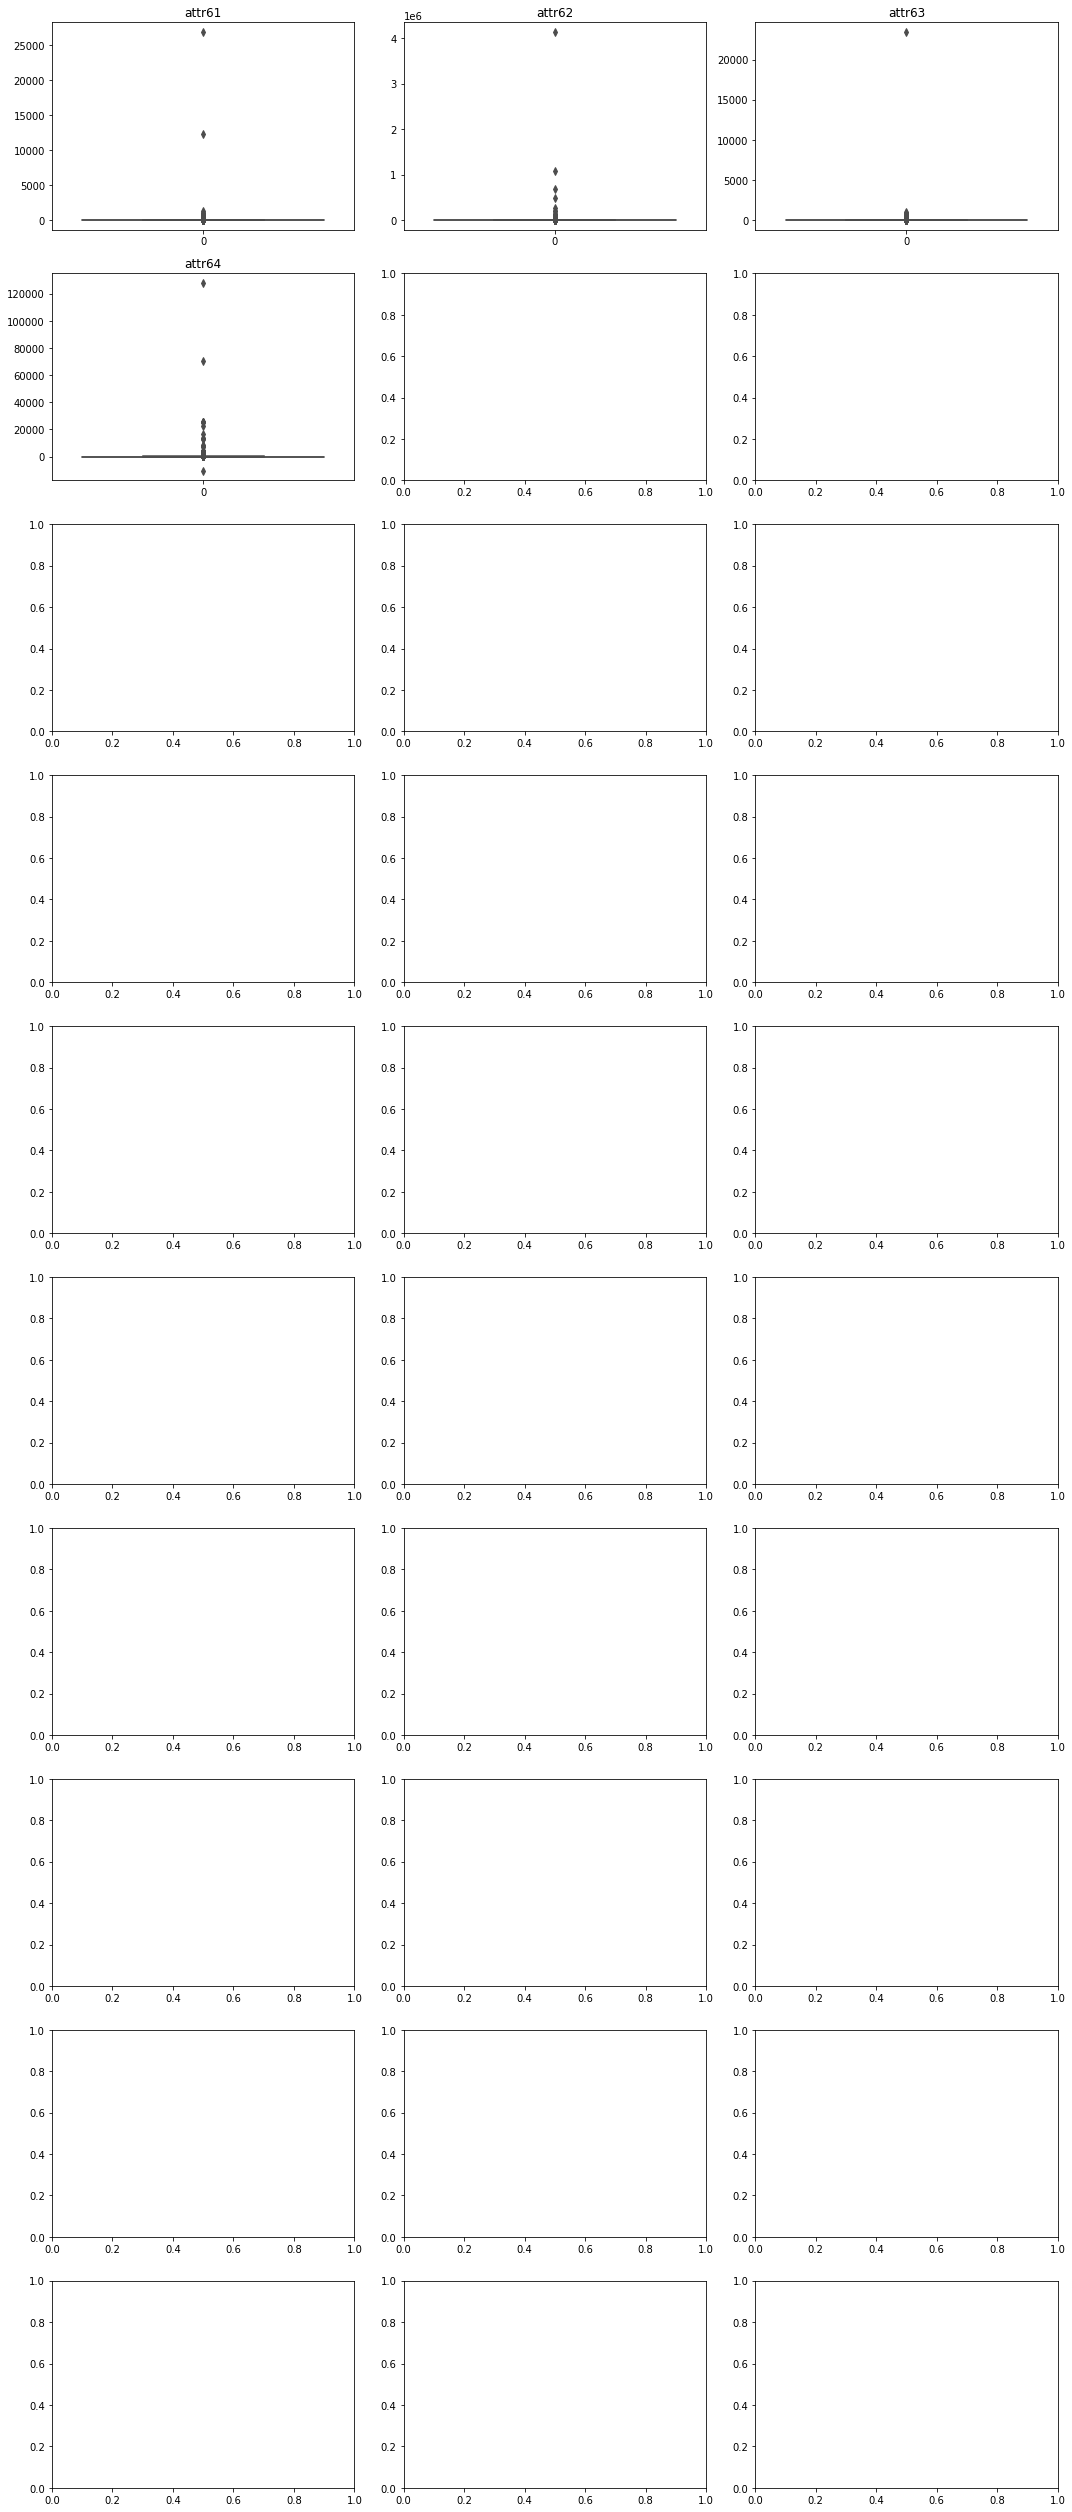

In [11]:
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
a = a.ravel()
for idx,ax in enumerate(a):
    if k >= len(col_names):
        break
    sns.boxplot(data=df[col_names[k]],color="red",ax=ax)
    ax.set_title(col_names[k])
    #ax.legend()
    k+=1
plt.tight_layout()

## 클래스 별(Bankruptcy, Non-Bankruptcy) 이상치 확인

In [12]:
import math

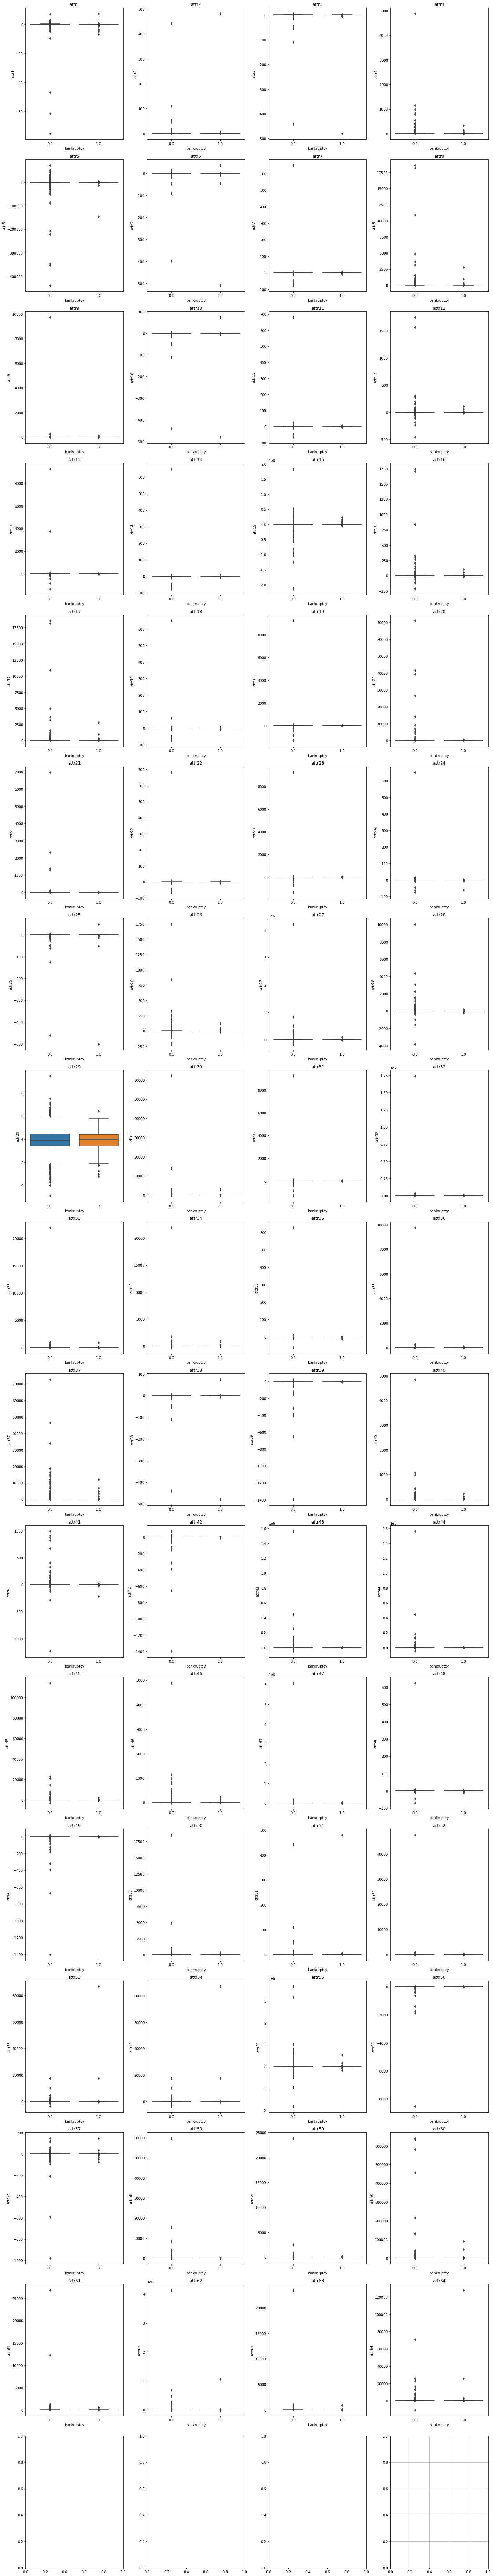

In [13]:
def plot_boxplots(df):
    n=len(df.columns)
    plt.subplots(math.ceil(n/4),4,figsize=(20,8*math.ceil(n/5)))
    plt.grid('off')
    
    for i,col in enumerate(df.drop('bankruptcy',axis=1).columns):
        plt.subplot(math.ceil(n/4),4,i+1)
        
        sns.boxplot(x='bankruptcy',y=col,data=df)
        plt.title(f'{col}')
        
    plt.tight_layout()
    plt.show()
plot_boxplots(df)

# 산점도 확인

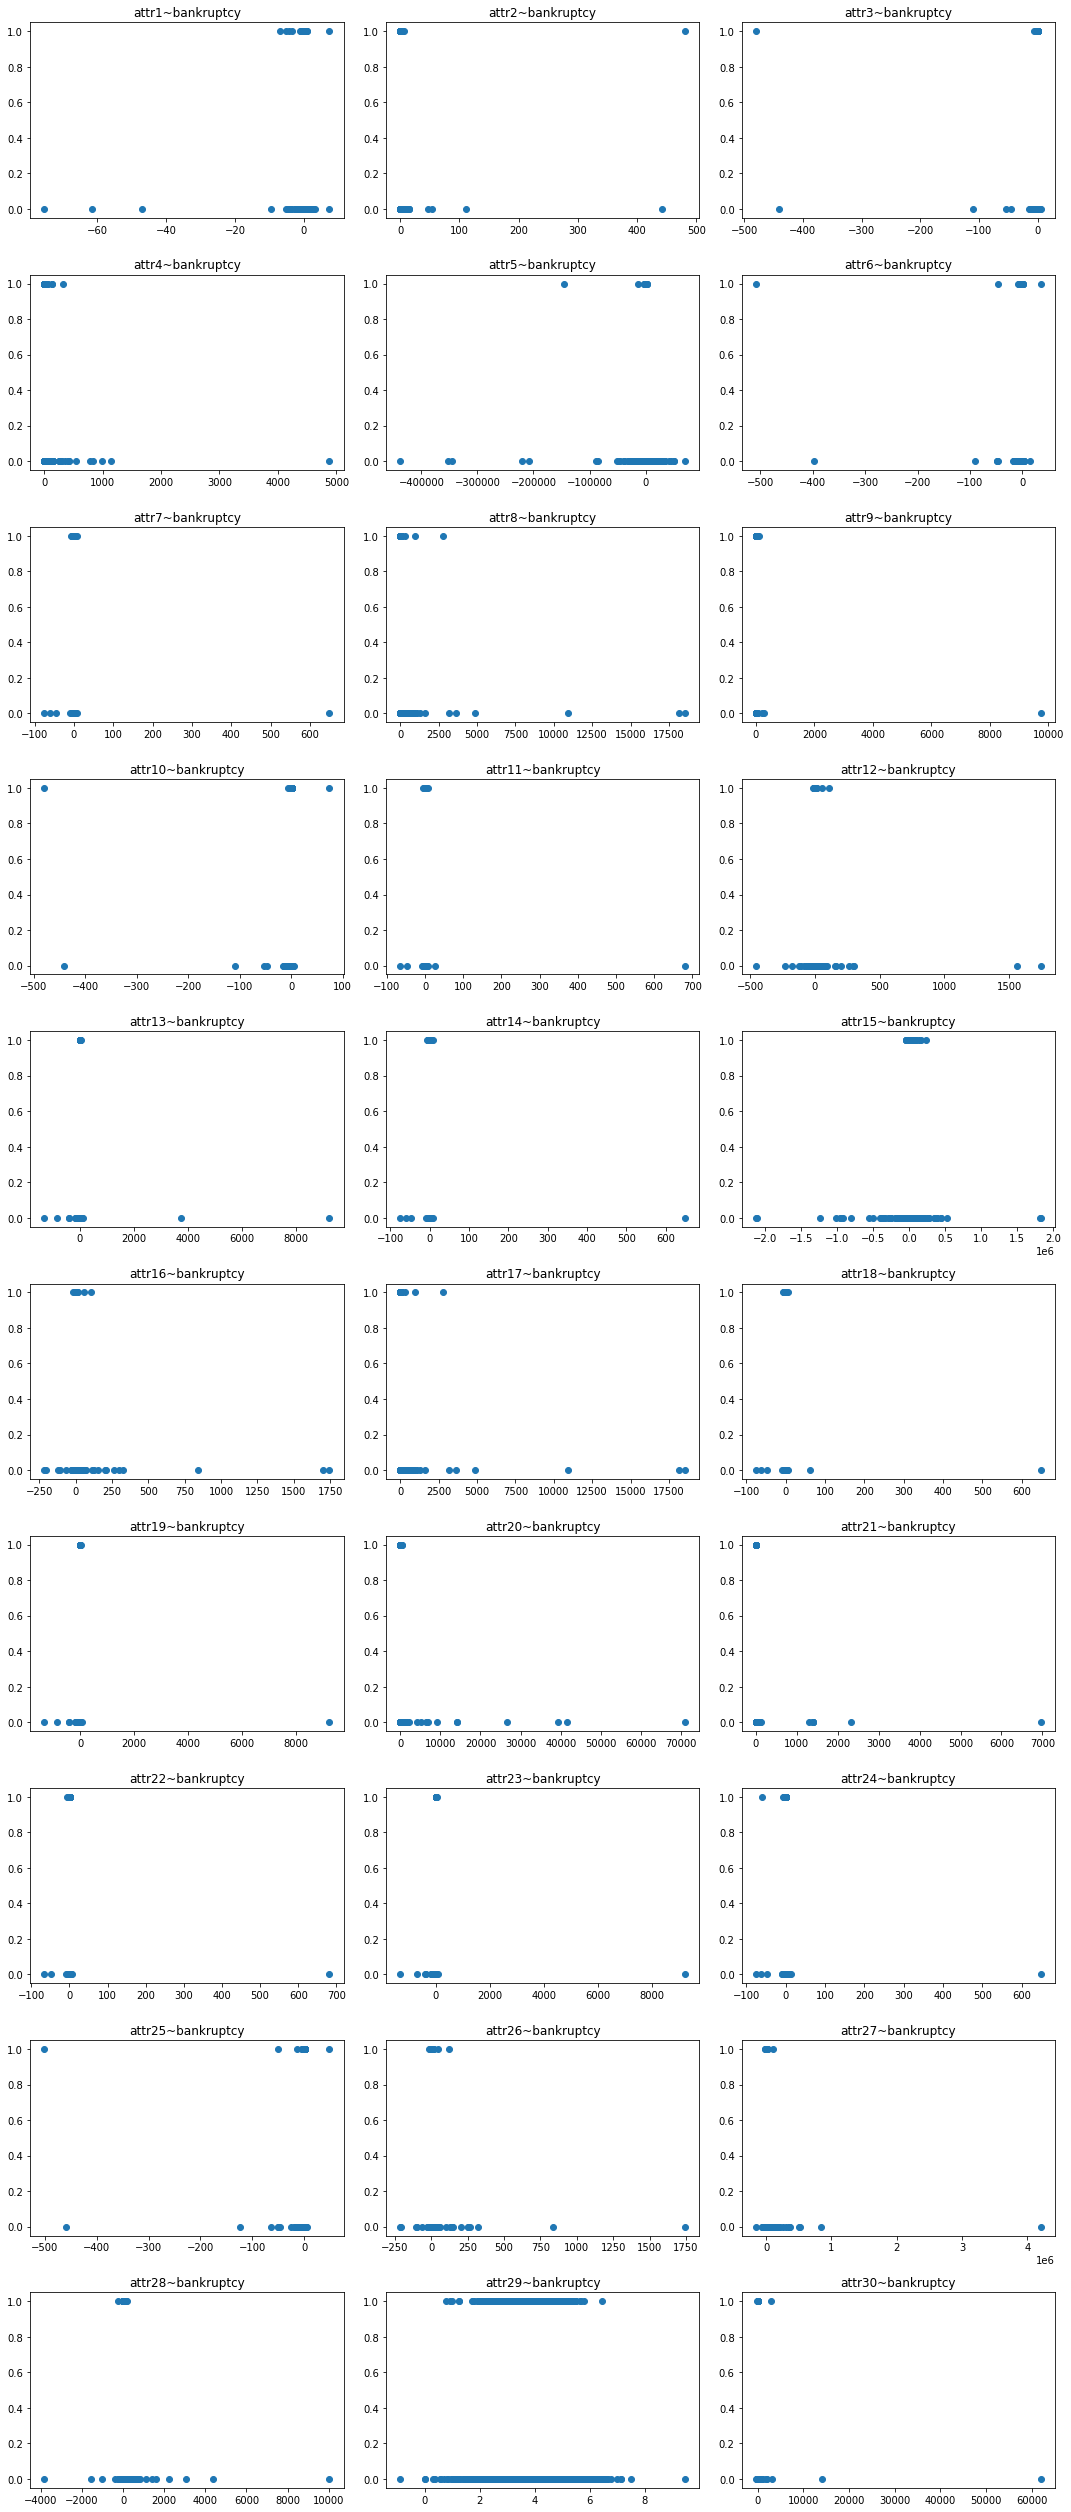

In [14]:
# scatter plot
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
Y = df.bankruptcy.values
a = a.ravel()
k=0
for idx,ax in enumerate(a):
    X= df[col_names[k]].values
    ax.scatter(X,Y)
    ax.set_title(col_names[k]+"~bankruptcy")
    k+=1
plt.tight_layout()

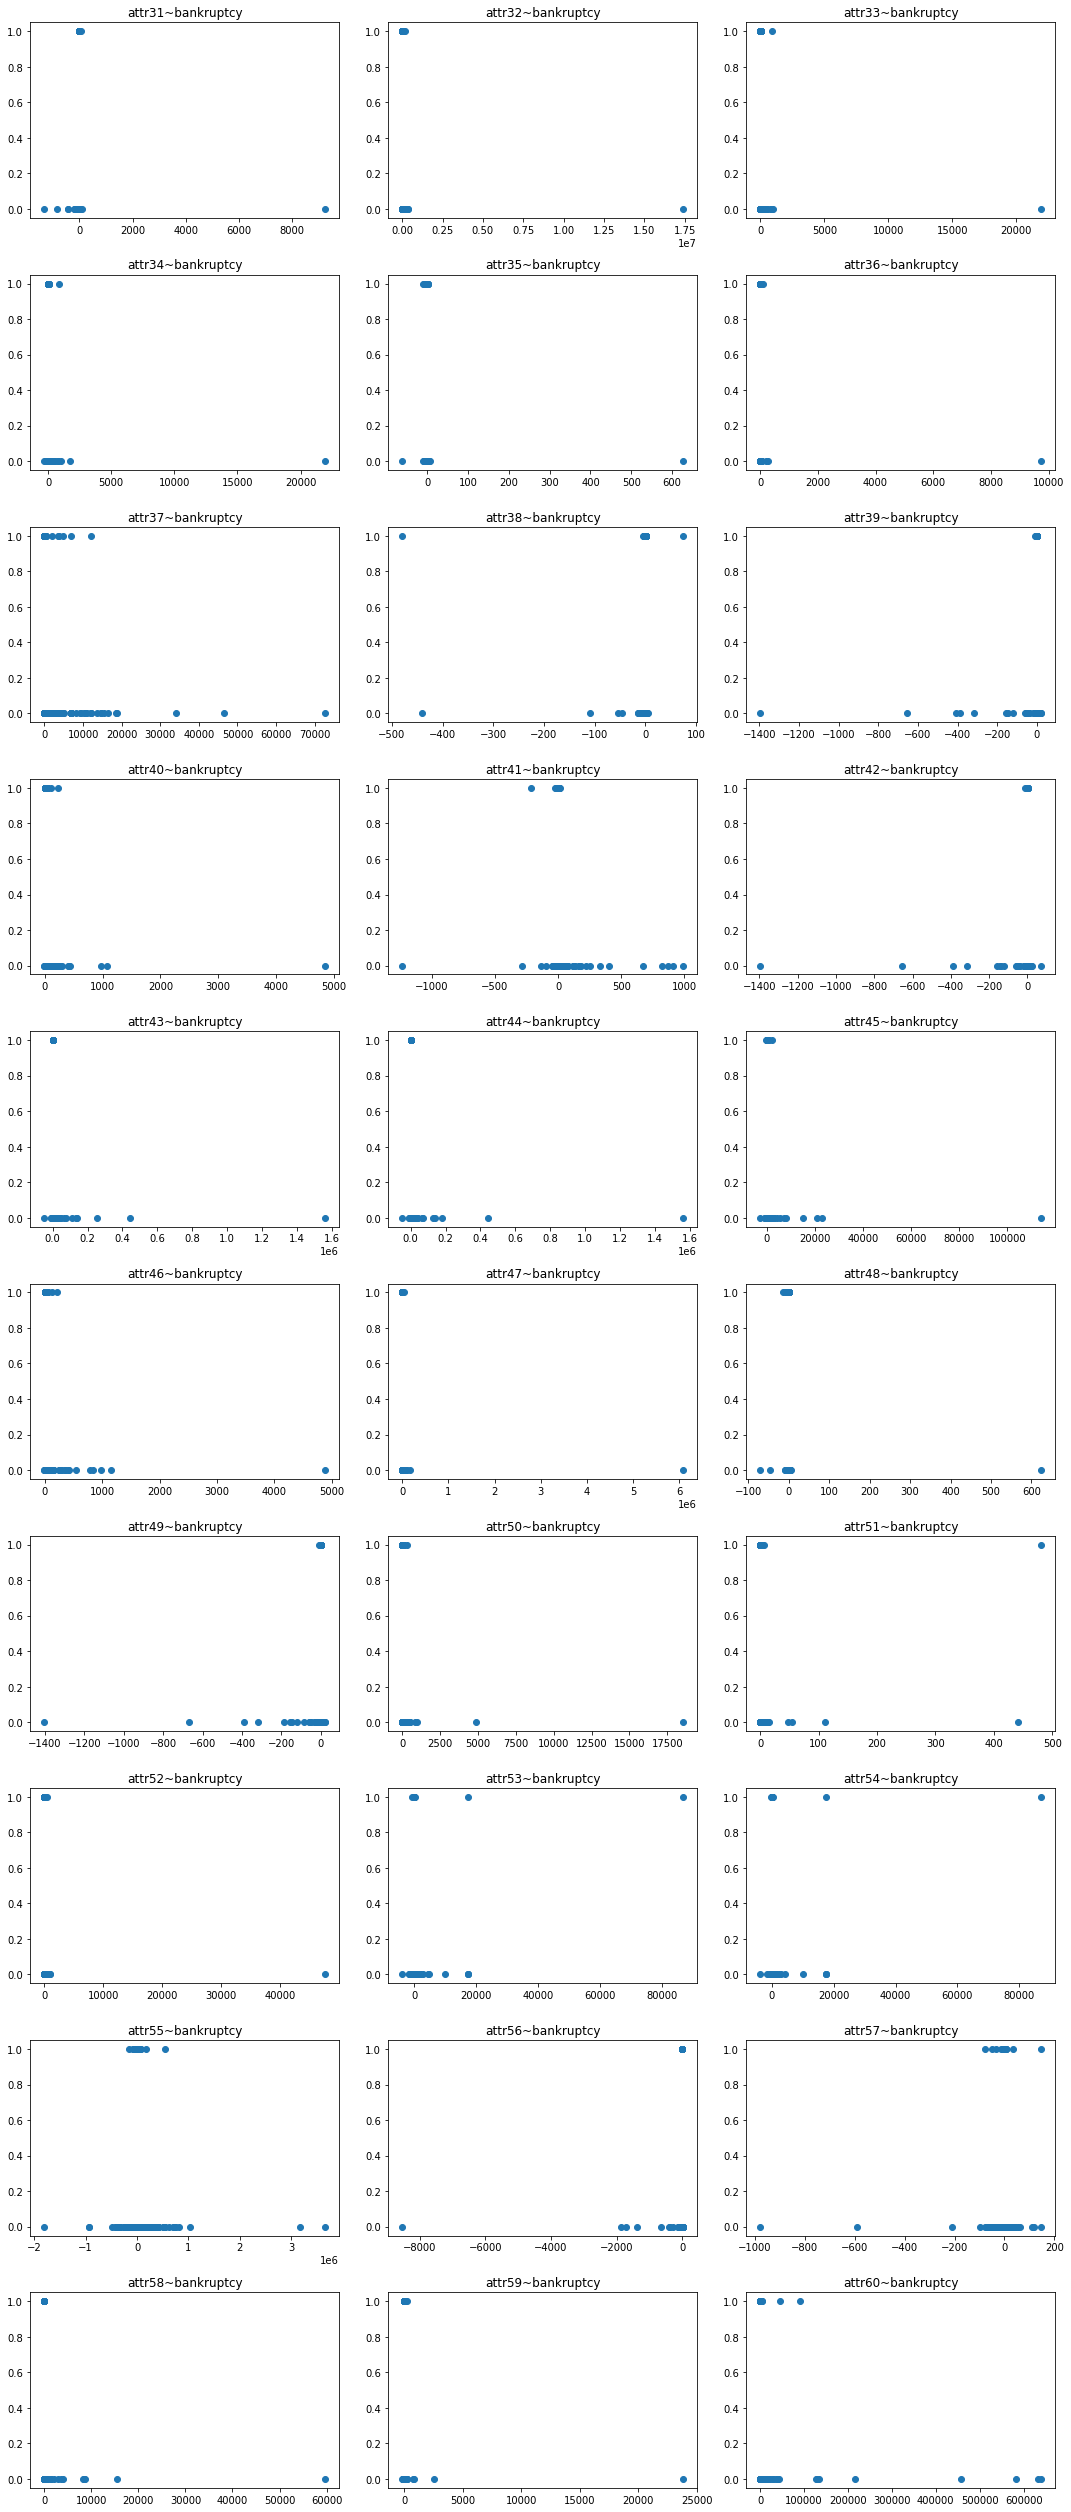

In [15]:
# scatter plot
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
Y = df.bankruptcy.values
a = a.ravel()
for idx,ax in enumerate(a):
    X= df[col_names[k]].values
    ax.scatter(X,Y)
    ax.set_title(col_names[k]+"~bankruptcy")
    k+=1
plt.tight_layout()

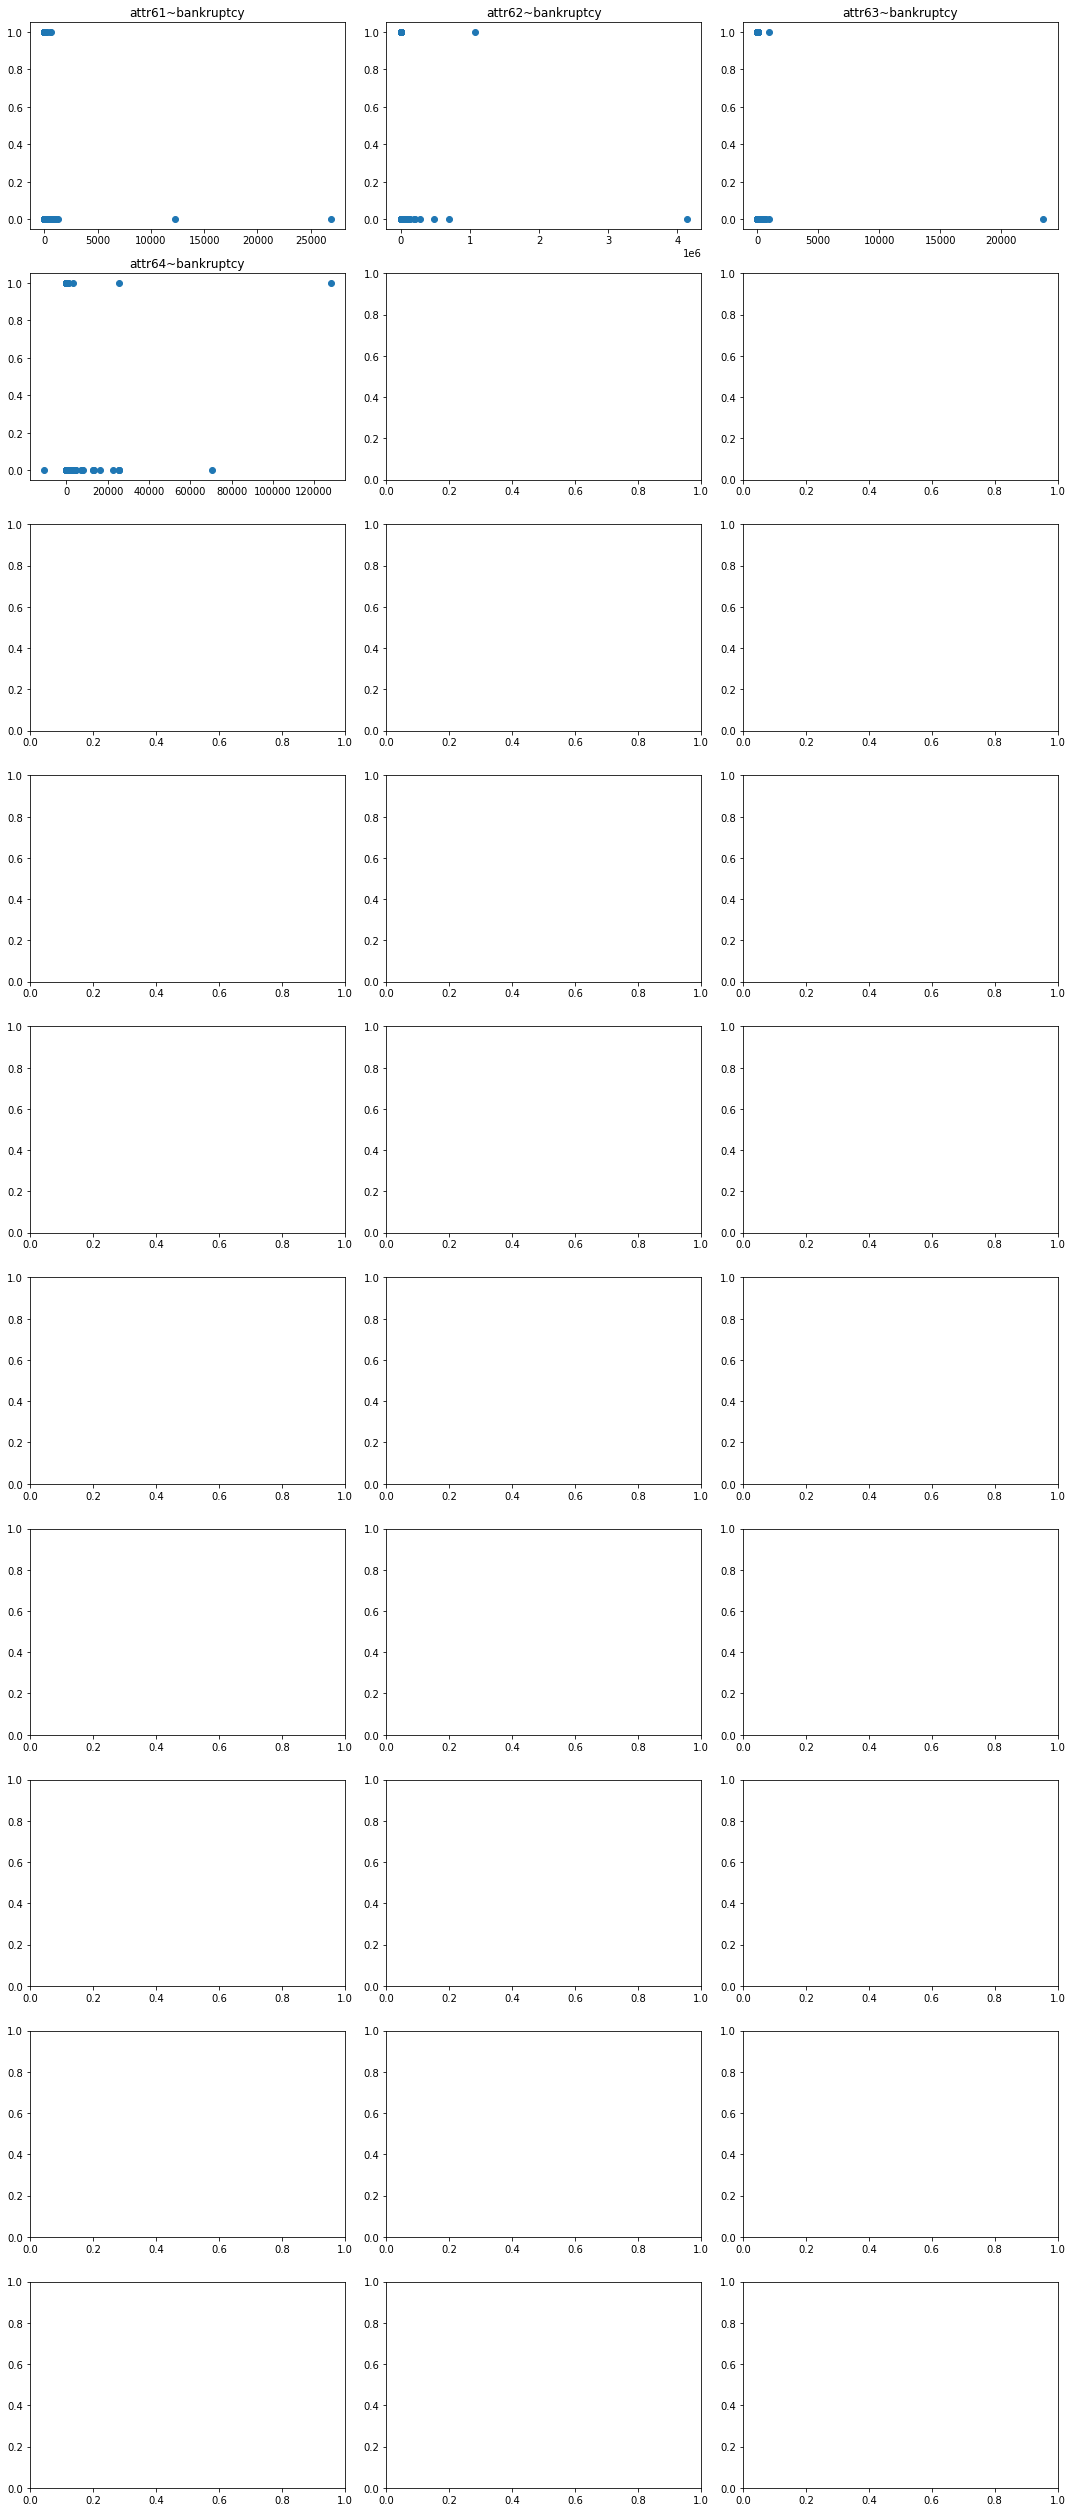

In [16]:
# scatter plot
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
Y = df.bankruptcy.values
a = a.ravel()
for idx,ax in enumerate(a):
    if k >= len(col_names):
        break
    X= df[col_names[k]].values
    ax.scatter(X,Y)
    ax.set_title(col_names[k]+"~bankruptcy")
    k+=1
plt.tight_layout()

# Scaling

In [17]:
def index_reset(data):
    Y = df['bankruptcy']
    data=data.reset_index()
    data=data.drop(labels=['index'], axis=1)
    Y= Y.reset_index()
    Y= Y.drop(labels=['index'], axis=1)
    data['bankruptcy']=Y
    return data

## 표준화만 하기!

In [18]:
#스케일링 전처리 , feature 값과 Y값 분리 
X = df.drop(labels=['bankruptcy'], axis=1)
col_names = X.columns

from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaled_standard = scaler_std.fit_transform(X)
standard_df = pd.DataFrame(scaled_standard, columns=col_names)

standard_df = index_reset(standard_df)
standard_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.143112,-0.027650,0.025665,-0.053311,0.016758,0.094639,0.020047,-0.032714,-0.017800,0.012594,...,0.017952,0.042017,-0.018922,-0.012767,-0.030908,-0.039713,-0.017995,-0.033613,-0.037120,0.0
1,-0.011202,-0.007989,0.017572,-0.056623,0.013782,0.017174,-0.012264,-0.033534,-0.026332,0.009216,...,0.017837,0.009539,-0.018915,-0.012768,-0.031489,-0.054983,-0.006195,-0.045550,-0.039690,0.0
2,0.192835,-0.052561,0.089689,-0.021769,0.027782,0.017222,0.029971,-0.027870,-0.012399,0.053203,...,0.018320,0.033503,-0.019004,-0.012768,-0.031257,-0.046340,-0.018970,-0.024201,-0.010758,0.0
3,0.165336,0.004483,-0.004115,-0.061350,0.007354,0.017222,0.024832,-0.034236,-0.016026,-0.003180,...,0.019745,0.060924,-0.019051,-0.010742,-0.031182,-0.040043,-0.017200,-0.037131,-0.038583,0.0
4,0.038395,-0.040385,0.043577,-0.045401,0.021390,0.045707,-0.002119,-0.031161,-0.018205,0.026764,...,0.017613,0.016807,-0.018874,-0.012768,-0.031143,-0.043633,-0.018423,-0.030586,-0.036717,0.0


## 정규화만 하기!

In [19]:
#스케일링 전처리 , feature 값과 Y값 분리 
X = df.drop(labels=['bankruptcy'], axis=1)
col_names = X.columns

from sklearn.preprocessing import MinMaxScaler

scaler_nor = MinMaxScaler()
norm_array = scaler_nor.fit_transform(X)
normal_df = pd.DataFrame(norm_array, columns=col_names)

normal_df = index_reset(normal_df)
normal_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.913301,0.000967,0.989161,0.000310,0.861013,0.935583,0.104318,0.000135,0.000181,0.866496,...,0.997654,0.869752,0.000091,0.007885,0.000013,0.000193,0.000266,0.000160,0.077030,0.0
1,0.911218,0.001238,0.989051,0.000274,0.860968,0.934644,0.104025,0.000123,0.000096,0.866455,...,0.997653,0.869398,0.000091,0.007885,0.000002,0.000024,0.000390,0.000041,0.077001,0.0
2,0.913972,0.000623,0.990036,0.000659,0.861183,0.934644,0.104408,0.000212,0.000235,0.866986,...,0.997658,0.869659,0.000090,0.007885,0.000007,0.000119,0.000255,0.000254,0.077334,0.0
3,0.913601,0.001411,0.988754,0.000221,0.860869,0.934644,0.104361,0.000111,0.000199,0.866306,...,0.997673,0.869959,0.000089,0.007905,0.000008,0.000189,0.000274,0.000125,0.077014,0.0
4,0.911887,0.000791,0.989406,0.000398,0.861085,0.934990,0.104117,0.000160,0.000177,0.866667,...,0.997651,0.869477,0.000091,0.007885,0.000009,0.000149,0.000261,0.000190,0.077035,0.0


## 표준화, 정규화 둘 다 하기!

In [20]:
#스케일링 전처리 , feature 값과 Y값 분리 
X = df.drop(labels=['bankruptcy'], axis=1)
col_names = X.columns

from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_standard = scaler_std.fit_transform(X)

# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler_nor = MinMaxScaler()
norm_array = scaler_nor.fit_transform(df_standard)
SN_df = pd.DataFrame(norm_array, columns=col_names)

SN_df = index_reset(SN_df)
SN_df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.913301,0.000967,0.989161,0.000310,0.861013,0.935583,0.104318,0.000135,0.000181,0.866496,...,0.997654,0.869752,0.000091,0.007885,0.000013,0.000193,0.000266,0.000160,0.077030,0.0
1,0.911218,0.001238,0.989051,0.000274,0.860968,0.934644,0.104025,0.000123,0.000096,0.866455,...,0.997653,0.869398,0.000091,0.007885,0.000002,0.000024,0.000390,0.000041,0.077001,0.0
2,0.913972,0.000623,0.990036,0.000659,0.861183,0.934644,0.104408,0.000212,0.000235,0.866986,...,0.997658,0.869659,0.000090,0.007885,0.000007,0.000119,0.000255,0.000254,0.077334,0.0
3,0.913601,0.001411,0.988754,0.000221,0.860869,0.934644,0.104361,0.000111,0.000199,0.866306,...,0.997673,0.869959,0.000089,0.007905,0.000008,0.000189,0.000274,0.000125,0.077014,0.0
4,0.911887,0.000791,0.989406,0.000398,0.861085,0.934990,0.104117,0.000160,0.000177,0.866667,...,0.997651,0.869477,0.000091,0.007885,0.000009,0.000149,0.000261,0.000190,0.077035,0.0


In [21]:
df= SN_df

# Correlation Matrix

## heat map

<AxesSubplot:>

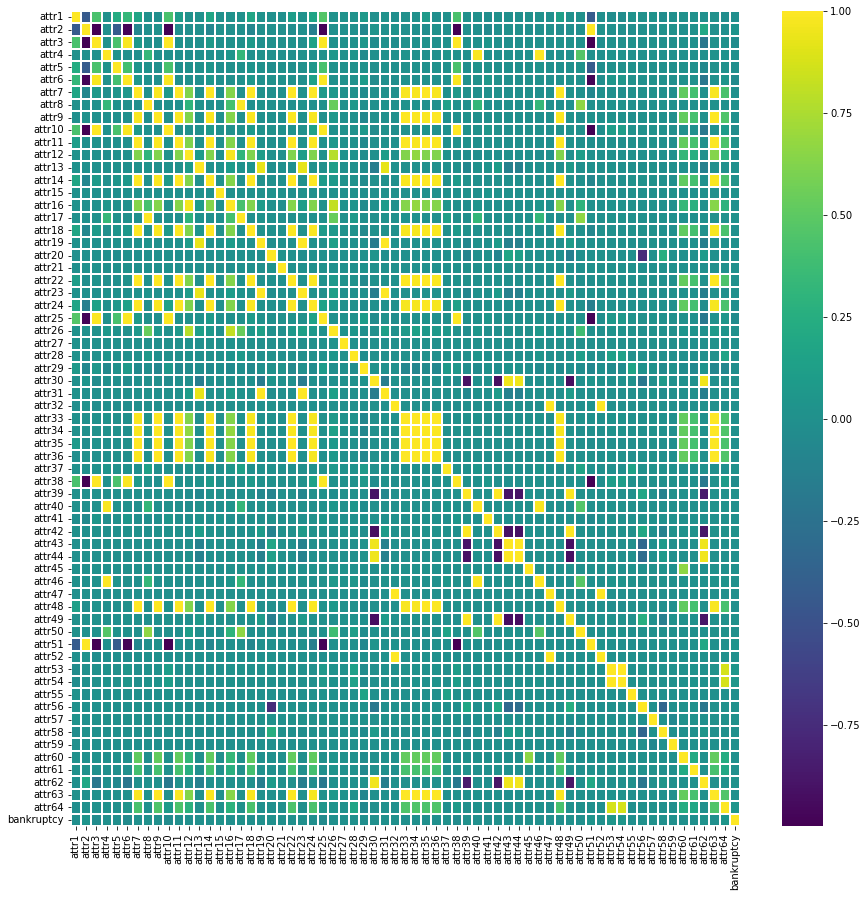

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

## 상관계수가 0.4 이상이면 상관성이 높다고 판단합니다.

<AxesSubplot:>

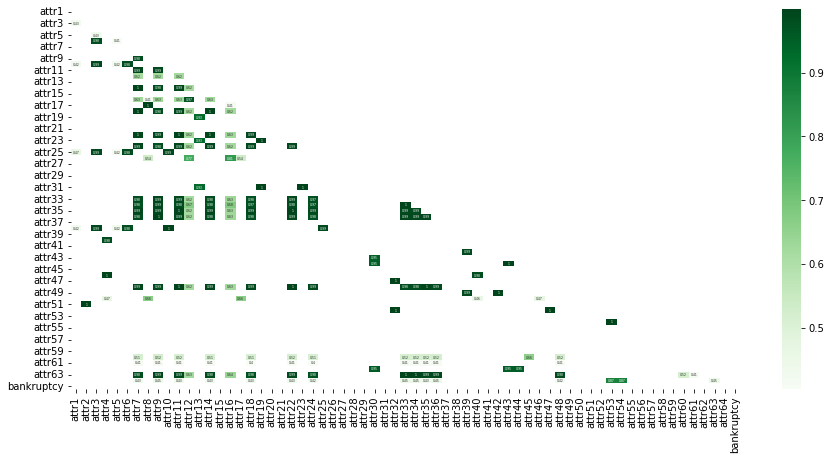

In [23]:
mask=np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
corr = df.corr()
kot = corr[corr>=.4]
plt.figure(figsize=(15,7))
sns.heatmap(kot, cmap="Greens",annot=True, annot_kws={"size": 3},mask=mask)

## 상관 계수를 순서대로 정렬합니다.

In [24]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\program files\python\python3.9\python.exe -m pip install --upgrade pip' command.


In [25]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [26]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
attr1,1.00,-0.43,0.43,0.00,0.23,0.33,0.17,0.00,-0.01,0.42,...,0.00,0.03,-0.02,-0.0,0.00,0.00,-0.00,0.01,-0.02,-0.01
attr2,-0.43,1.00,-1.00,-0.01,-0.43,-0.98,-0.07,-0.00,0.01,-0.99,...,-0.00,-0.00,0.00,0.0,-0.00,0.00,0.19,-0.00,-0.00,0.04
attr3,0.43,-1.00,1.00,0.01,0.43,0.98,0.07,0.00,-0.01,0.99,...,0.00,0.00,-0.00,-0.0,0.00,-0.00,-0.20,0.00,0.00,-0.04
attr4,0.00,-0.01,0.01,1.00,0.03,0.00,-0.00,0.33,-0.00,0.01,...,0.00,0.00,0.00,-0.0,0.00,-0.00,-0.00,0.01,0.02,-0.00
attr5,0.23,-0.43,0.43,0.03,1.00,0.41,0.04,0.02,-0.00,0.42,...,0.00,-0.00,-0.00,0.0,0.00,-0.00,-0.06,0.00,0.00,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr61,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.41,-0.00,0.41,-0.00,...,0.00,0.00,-0.00,-0.0,0.21,1.00,-0.00,0.41,0.19,-0.00
attr62,-0.00,0.19,-0.20,-0.00,-0.06,-0.20,-0.00,-0.00,-0.00,-0.19,...,-0.21,0.00,0.05,-0.0,-0.00,-0.00,1.00,-0.00,-0.00,0.01
attr63,0.01,-0.00,0.00,0.01,0.00,0.00,0.98,0.00,0.99,0.00,...,0.00,0.00,-0.00,-0.0,0.52,0.41,-0.00,1.00,0.45,-0.00
attr64,-0.02,-0.00,0.00,0.02,0.00,0.04,0.43,0.00,0.45,0.09,...,0.00,0.00,-0.00,-0.0,0.23,0.19,-0.00,0.45,1.00,0.04


In [27]:
s = corr_df.unstack()
s

attr1       attr1         1.00
            attr2        -0.43
            attr3         0.43
            attr4         0.00
            attr5         0.23
                          ... 
bankruptcy  attr61       -0.00
            attr62        0.01
            attr63       -0.00
            attr64        0.04
            bankruptcy    1.00
Length: 4225, dtype: float64

In [36]:
# Series이므로 DataFrame으로 변경한다. 
df_corr = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df_corr.head(30).style.background_gradient(cmap='viridis')

## 상관계수가 잘 보이는 Matrix

In [29]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
attr1,1.000000,-0.429296,0.428742,0.002429,0.230974,0.332241,0.174815,0.000417,-0.009096,0.423263,0.107564,0.022262,0.010172,0.174814,0.003385,0.017416,0.000420,0.174029,0.011151,-0.003931,-0.001598,0.106133,0.011104,0.170052,0.467994,0.018541,0.010399,0.010812,0.077081,-0.001351,0.011147,-0.013317,0.005796,0.005736,0.085613,-0.009044,0.005057,0.422375,0.003604,0.000399,-0.015753,0.006059,-0.001589,-0.001369,0.007195,0.001651,-0.002804,0.120643,0.006382,0.000653,-0.428470,-0.013466,-0.026968,-0.027214,0.010243,0.003597,0.028961,-0.023891,-0.000576,0.004551,0.000657,-0.001311,0.007314,-0.021718,-0.011885
attr2,-0.429296,1.000000,-0.998611,-0.005425,-0.426262,-0.981252,-0.073451,-0.003329,0.005907,-0.993925,-0.008036,-0.003720,-0.000950,-0.073451,0.001178,-0.003676,-0.003345,-0.073138,-0.001000,-0.000316,-0.000363,-0.015665,-0.000977,-0.147772,-0.987711,-0.004227,-0.002022,-0.004191,-0.069541,0.037129,-0.000991,0.022438,-0.002071,-0.001626,-0.016334,0.006506,-0.004699,-0.993175,-0.002335,-0.003387,-0.051085,-0.000827,0.000973,0.001001,-0.005378,-0.004666,0.001332,-0.018274,-0.000808,-0.002291,0.998988,0.020954,-0.002278,-0.002187,-0.008826,-0.001087,-0.000735,0.001335,0.000609,-0.001285,0.001129,0.194971,-0.002207,-0.001401,0.038225
attr3,0.428742,-0.998611,1.000000,0.006489,0.427336,0.979955,0.073582,0.002178,-0.005591,0.992486,0.008217,0.002510,-0.000068,0.073582,-0.001751,0.003043,0.002186,0.073260,-0.000067,0.000817,0.000716,0.015868,-0.000075,0.147842,0.986196,0.003194,0.002519,0.006247,0.058126,-0.036818,-0.000070,-0.022437,0.002337,0.001761,0.016573,-0.006183,0.004148,0.992849,0.002347,0.004108,0.051836,0.000664,-0.000936,-0.000993,0.005495,0.005561,-0.001287,0.018453,0.000628,0.002852,-0.999309,-0.020952,0.001697,0.001727,0.009687,0.000326,0.000728,-0.000668,-0.000089,0.001299,-0.002002,-0.195245,0.002465,0.001803,-0.038414
attr4,0.002429,-0.005425,0.006489,1.000000,0.026661,0.001744,-0.000013,0.330759,-0.000937,0.006793,-0.000271,-0.012164,0.000225,-0.000013,-0.000544,0.048206,0.330701,-0.000068,0.000458,0.000297,-0.000490,-0.000318,0.000460,-0.000090,0.005745,0.069324,0.006705,0.043238,-0.049494,-0.000897,0.000467,-0.000832,0.024105,0.002820,-0.000310,-0.000944,0.042674,0.006274,-0.000149,0.979100,-0.001521,0.000026,0.001701,0.001698,0.003484,0.998729,-0.000781,-0.000122,-0.000049,0.467701,-0.004821,-0.000832,0.030822,0.030891,0.003097,0.000453,0.000800,0.000074,-0.000747,0.000257,-0.000772,-0.001222,0.014670,0.021268,-0.002467
attr5,0.230974,-0.426262,0.427336,0.026661,1.000000,0.405941,0.039510,0.015975,-0.000753,0.424077,-0.001769,0.004824,0.001433,0.039510,-0.009398,0.007679,0.015973,0.039351,0.001479,-0.020252,0.000751,0.000158,0.001488,0.058404,0.419706,0.009689,0.001882,0.003999,0.023690,-0.011121,0.001476,-0.011327,0.001382,0.000516,-0.000041,0.000371,0.006730,0.424449,-0.000210,0.019790,0.007596,-0.000427,-0.001280,-0.000083,0.003710,0.026287,-0.000158,-0.000033,-0.000491,0.021488,-0.426753,-0.010941,0.000922,0.000932,0.008551,0.000016,-0.001055,-0.000784,0.000222,0.000978,-0.000939,-0.059400,0.001049,0.000935,-0.007580
attr6,0.332241,-0.981252,0.979955,0.001744,0.405941,1.000000,0.056229,0.000434,-0.005663,0.981037,-0.002534,0.002305,-0.000302,0.056229,-0.002365,0.001682,0.000445,0.056003,-0.000395,0.000461,0.000385,0.005639,-0.000392,0.136686,0.984979,0.002261,0.000540,0.002043,0.084322,-0.038374,-0.000402,-0.022041,0.000436,0.000018,0.006147,-0.006208,0.002963,0.980568,0.002388,0.000900,0.056562,0.000602,-0.000726,-0.000760,0.004221,0.001391,-0.001709,0.005915,0.00

# 정규분포(확률 밀도 함수) 확인

In [30]:
from scipy.stats import norm

In [31]:
normal_df = df.loc[df["bankruptcy"]==0,:]
abnormal_df = df.loc[df["bankruptcy"]==1,:]

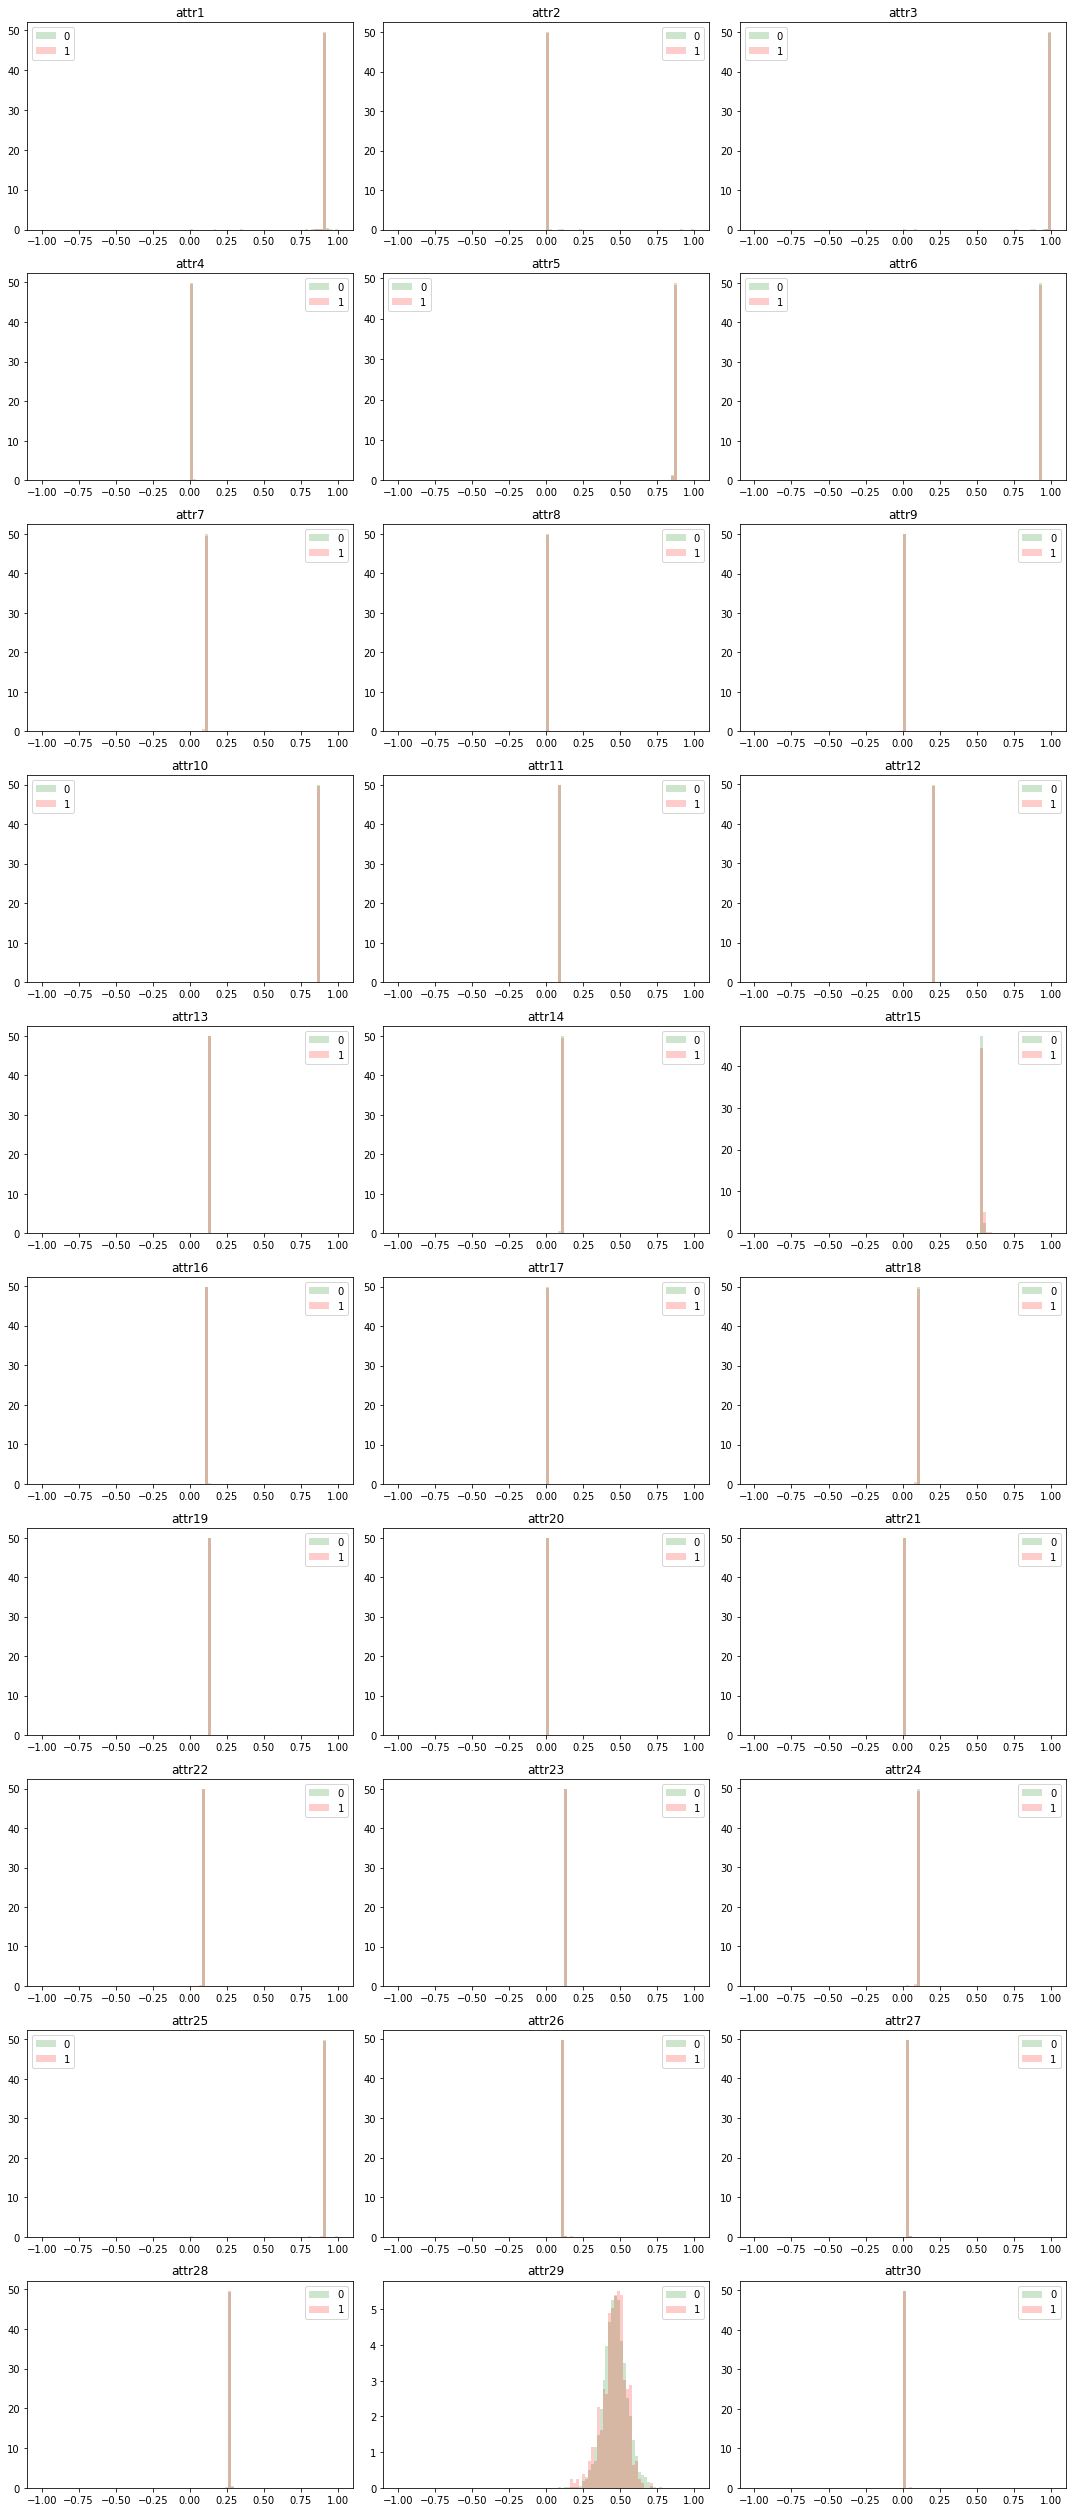

In [32]:
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
a = a.ravel()
k=0
for idx,ax in enumerate(a):
    ax.hist(normal_df[col_names[k]], color = 'green', alpha = 0.2, bins = 100, range = [-1, 1], label = '0',density=True )
    ax.hist(abnormal_df[col_names[k]], color = 'red', alpha = 0.2, bins = 100, range = [-1, 1], label = '1',density=True)
    ax.legend()
    ax.set_title(col_names[k])
    k+=1
plt.tight_layout()

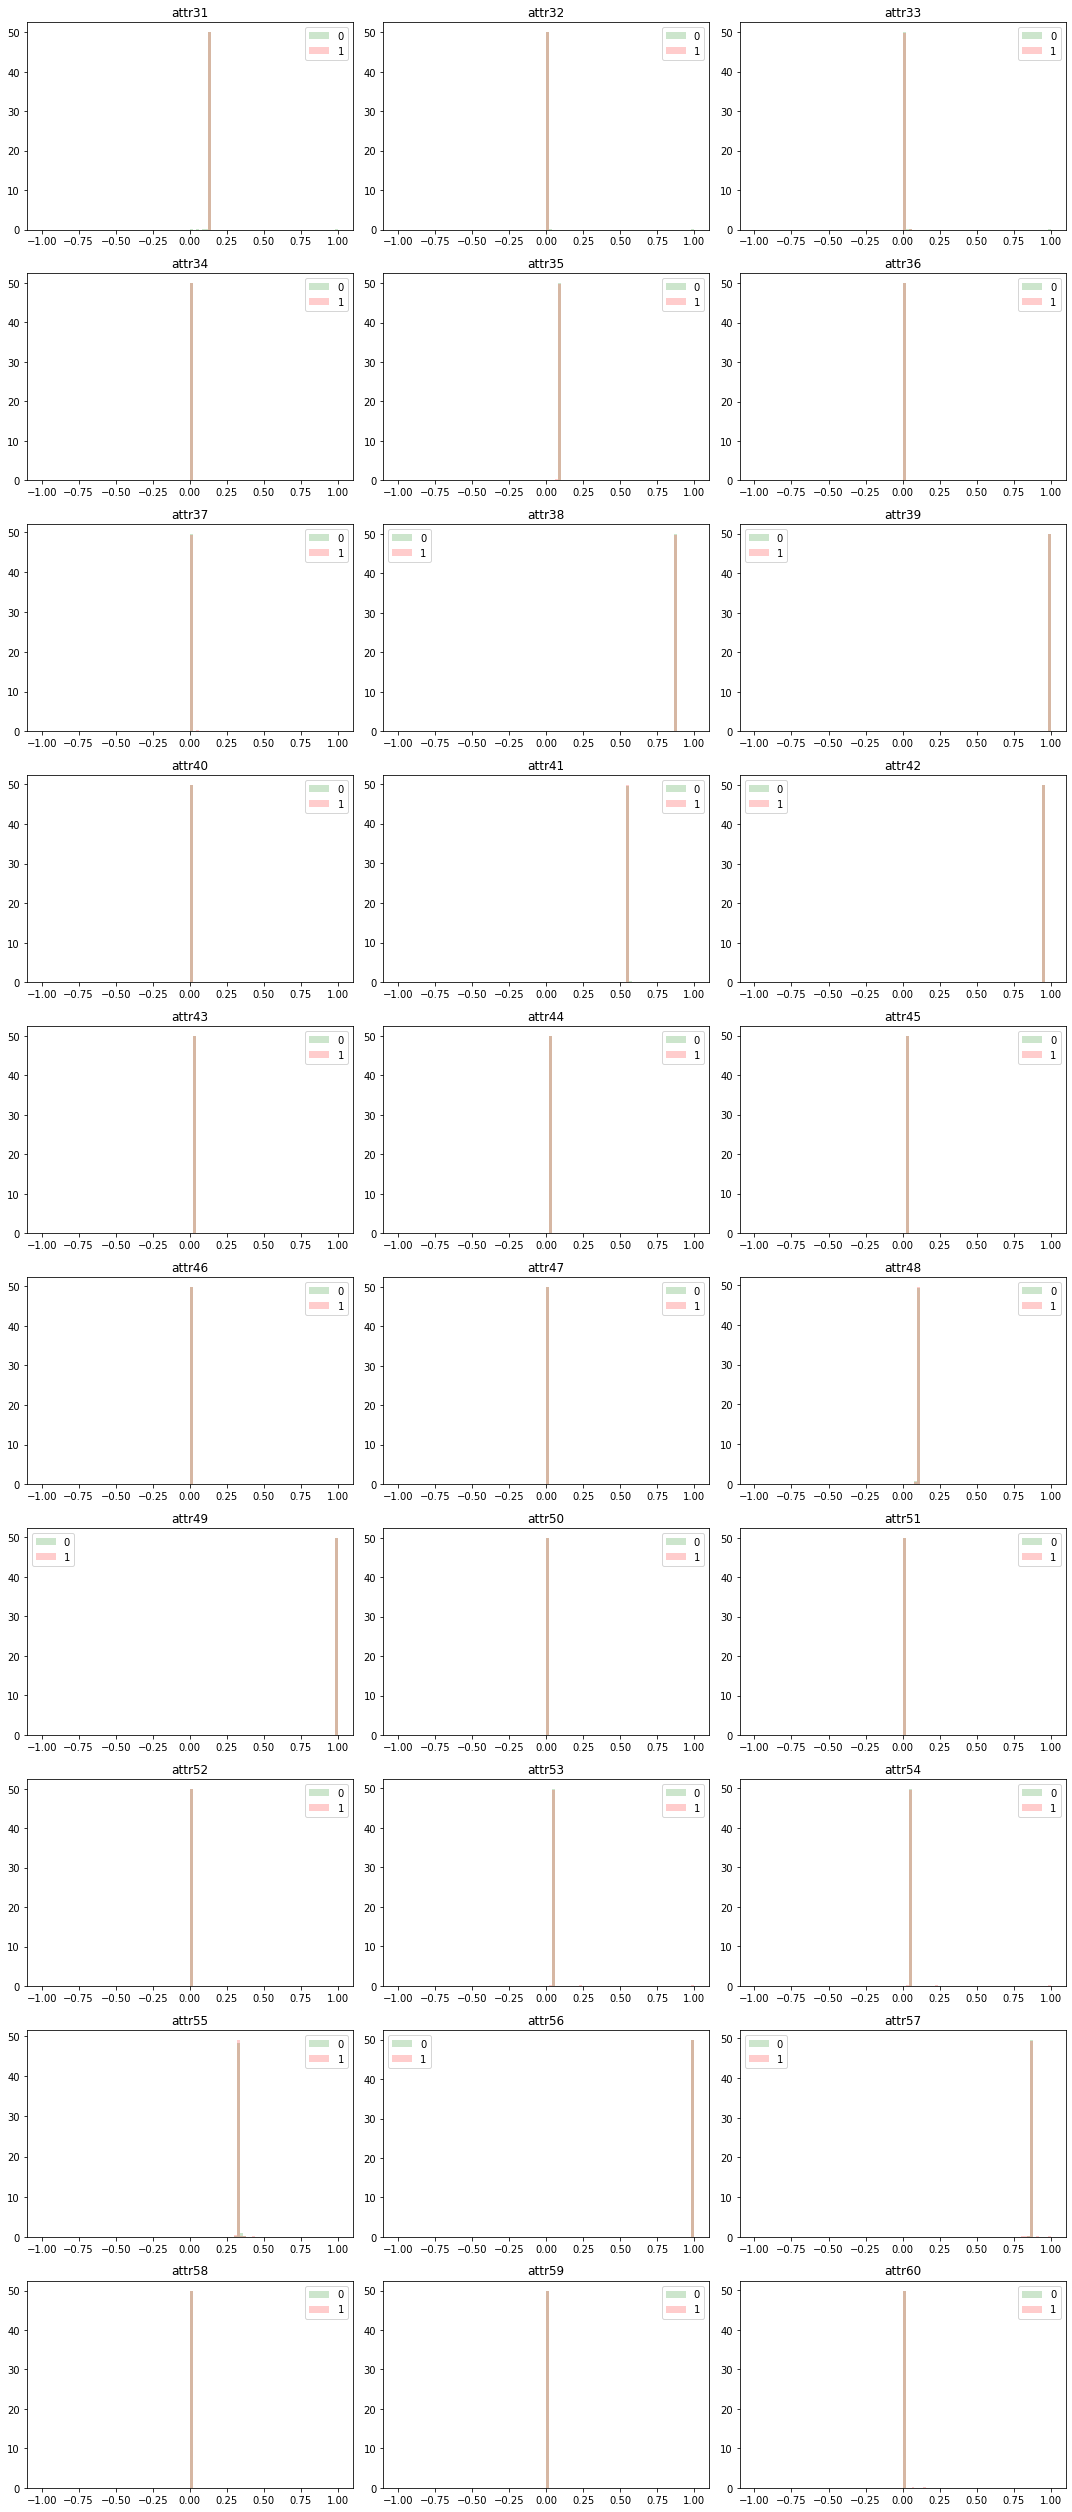

In [33]:
# create a 3x3 grid of subplots
f,a = plt.subplots(10,3, figsize=(15, 35))
a = a.ravel()
for idx,ax in enumerate(a):
    if k >= len(col_names):
        break
    ax.hist(normal_df[col_names[k]], color = 'green', alpha = 0.2, bins = 100, range = [-1, 1], label = '0',density=True )
    ax.hist(abnormal_df[col_names[k]], color = 'red', alpha = 0.2, bins = 100, range = [-1, 1], label = '1',density=True)
    ax.legend()
    ax.set_title(col_names[k])
    k+=1
plt.tight_layout()